In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_2/',
              model_directory+'/irv/stage_2/',
              model_directory+'/neural_networks/stage_2/',
              model_directory+'/docking/stage_2/',
              model_directory+'/baseline/stage_2/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], 1)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], 1))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], 1))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 1))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], 1))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
col_indices = [i for i in col_indices if 'PriA-SSB AS' in gather_df.columns[i]]
gather_df.columns = [col.replace('PriA-SSB AS', 'PriA-SSB prospective') for col in gather_df.columns]
metric_names = list(gather_df.columns.values[col_indices])

gather_df = gather_df[metric_names]
gather_df = gather_df.dropna(axis=0)

#setup comparison matrix and overlaps
mm_comp_dicts = get_mean_median_comps(gather_df, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict = get_agg_comp(mm_comp_dicts, None, mean_w=1, median_w=0, tukey_w=0)
overlapping_models = get_overlap(agg_comp_dict, N=1)

---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [3]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

,ROC AUC PriA-SSB prospective,BEDROC AUC PriA-SSB prospective,PR auc.integral PriA-SSB prospective,NEF_0.1 % PriA-SSB prospective,NEF_0.15 % PriA-SSB prospective,NEF_0.5 % PriA-SSB prospective,NEF_1 % PriA-SSB prospective,NEF_2 % PriA-SSB prospective,NEF_5 % PriA-SSB prospective,NEF_10 % PriA-SSB prospective,NEF_20 % PriA-SSB prospective,NEF AUC PriA-SSB prospective,n_hits_100 PriA-SSB prospective,n_hits_250 PriA-SSB prospective,n_hits_500 PriA-SSB prospective,n_hits_1000 PriA-SSB prospective,n_hits_2500 PriA-SSB prospective,n_hits_5000 PriA-SSB prospective,n_hits_10000 PriA-SSB prospective
0,"SingleRegression_a, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","SingleClassification_b, 1.0","RandomForest_g, 1.0","RandomForest_a, 1.0","RandomForest_a, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","SingleRegression_a, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","RandomForest_g, 1.0","RandomForest_g, 1.0","RandomForest_h, 1.0","SingleRegression_a, 1.0","SingleRegression_a, 1.0"
1,"SingleRegression_b, 2.0","RandomForest_g, 2.0","RandomForest_g, 2.0","RandomForest_h, 2.0","RandomForest_h, 2.0","RandomForest_h, 1.0","RandomForest_h, 1.0","RandomForest_g, 1.0","RandomForest_g, 1.0","RandomForest_e, 2.0","RandomForest_e, 1.0","RandomForest_e, 2.0","RandomForest_g, 1.0","RandomForest_g, 1.0","RandomForest_h, 2.0","IRV_e, 2.0","RandomForest_f, 2.0","RandomForest_h, 1.0","SingleRegression_b, 1.0"
2,"RandomForest_h, 3.0","RandomForest_e, 3.0","SingleClassification_b, 3.0","RandomForest_g, 2.0","SingleClassification_b, 3.0","RandomForest_g, 1.0","RandomForest_g, 1.0","RandomForest_b, 3.0","RandomForest_b, 3.0","RandomForest_d, 2.0","RandomForest_d, 1.0","RandomForest_d, 3.0","RandomForest_e, 1.0","RandomForest_b, 1.0","RandomForest_b, 3.0","RandomForest_h, 2.0","RandomForest_e, 2.0","RandomForest_f, 1.0","RandomForest_h, 3.0"
3,"RandomForest_e, 4.0","RandomForest_d, 4.0","RandomForest_c, 4.0","MultiClassification_a, 4.0","SingleRegression_a, 4.0","RandomForest_b, 4.0","RandomForest_e, 1.0","RandomForest_a, 3.0","IRV_e, 3.0","SingleRegression_a, 4.0","RandomForest_h, 4.0","RandomForest_g, 4.0","RandomForest_d, 1.0","RandomForest_c, 4.0","SingleRegression_a, 3.0","RandomForest_e, 2.0","RandomForest_d, 2.0","RandomForest_e, 1.0","RandomForest_f, 3.0"
4,"RandomForest_g, 5.0","RandomForest_c, 5.0","RandomForest_b, 5.0","RandomForest_f, 4.0","RandomForest_d, 5.0","RandomForest_e, 4.0","RandomForest_c, 1.0","RandomForest_e, 3.0","RandomForest_a, 3.0","RandomForest_g, 4.0","RandomForest_g, 4.0","RandomForest_c, 5.0","RandomForest_c, 5.0","RandomForest_a, 4.0","RandomForest_a, 3.0","RandomForest_d, 2.0","RandomForest_a, 5.0","RandomForest_d, 1.0","IRV_d, 5.0"
5,"RandomForest_d, 6.0","RandomForest_b, 6.0","RandomForest_d, 6.0","RandomForest_d, 6.0","RandomForest_e, 5.0","RandomForest_d, 4.0","RandomForest_b, 1.0","RandomForest_c, 3.0","RandomForest_e, 3.0","RandomForest_f, 4.0","RandomForest_f, 4.0","SingleRegression_a, 6.0","RandomForest_b, 5.0","RandomForest_e, 4.0","RandomForest_e, 3.0","RandomForest_b, 6.0","SingleRegression_a, 5.0","RandomForest_c, 1.0","IRV_e, 5.0"
6,"RandomForest_f, 7.0","RandomForest_a, 7.0","RandomForest_e, 7.0","RandomForest_a, 6.0","MultiClassification_a, 5.0","RandomForest_c, 7.0","RandomForest_d, 7.0","SingleRegression_a, 7.0","RandomForest_d, 3.0","RandomForest_c, 4.0","RandomForest_c, 4.0","RandomForest_b, 7.0","RandomForest_a, 7.0","RandomForest_d, 4.0","RandomForest_c, 3.0","RandomForest_a, 6.0","RandomForest_g, 5.0","IRV_e, 7.0","RandomForest_g, 7.0"
7,"RandomForest_a, 8.0","SingleRegression_a, 8.0","RandomForest_a, 8.0","IRV_c, 6.0","RandomForest_c, 5.0","baseline, 8.0","baseline, 8.0","RandomForest_d, 7.0","RandomForest_c, 8.0","RandomForest_b, 8.0","RandomForest_a, 8.0","RandomForest_a, 8.0","SingleClassification_b, 8.0","baseline, 8.0","RandomForest_d, 8.0","SingleRegression_a, 8.0","RandomForest_c, 5.0","RandomForest_g, 7.0","RandomForest_e, 7.0"
8,"RandomFor

---
## Metrics Most Similar to N-Hits

In [4]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-7], metric_names[-7:])

,n_hits_100 PriA-SSB prospective,n_hits_250 PriA-SSB prospective,n_hits_500 PriA-SSB prospective,n_hits_1000 PriA-SSB prospective,n_hits_2500 PriA-SSB prospective,n_hits_5000 PriA-SSB prospective,n_hits_10000 PriA-SSB prospective


---
## Overlapping top N models over all metrics

In [5]:
get_overlap(agg_comp_dict, N=1)

,overlap_perc
RandomForest_h,0.6316
RandomForest_g,0.4737
SingleRegression_a,0.2105
RandomForest_e,0.2105
RandomForest_d,0.1579
RandomForest_a,0.1053
RandomForest_c,0.1053
RandomForest_b,0.1053
SingleClassification_b,0.0526
RandomForest_f,0.0526


In [6]:
get_overlap(agg_comp_dict, N=5)

,overlap_perc
RandomForest_h,1.0000
RandomForest_g,0.8947
RandomForest_e,0.8421
RandomForest_c,0.6842
RandomForest_d,0.6316
RandomForest_b,0.5263
SingleRegression_a,0.4211
RandomForest_a,0.3684
RandomForest_f,0.3158
SingleClassification_b,0.1579


## Spearman's Rank-order correlation coefficient 

In [7]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-7], metric_names[-7:], labels=['PriA-SSB prospective'])

In [8]:
ordered_spearman_df

,n_hits_100 PriA-SSB prospective,n_hits_250 PriA-SSB prospective,n_hits_500 PriA-SSB prospective,n_hits_1000 PriA-SSB prospective,n_hits_2500 PriA-SSB prospective,n_hits_5000 PriA-SSB prospective,n_hits_10000 PriA-SSB prospective
0,NEF_0.5 %,NEF_1 %,NEF_2 %,NEF_5 %,NEF_10 %,NEF_20 %,ROC AUC
1,NEF_1 %,NEF_0.5 %,NEF_5 %,NEF_2 %,NEF AUC,NEF AUC,NEF_20 %
2,NEF_2 %,NEF_2 %,BEDROC AUC,BEDROC AUC,BEDROC AUC,NEF_10 %,NEF_10 %
3,NEF_5 %,NEF_5 %,NEF_1 %,NEF AUC,NEF_20 %,BEDROC AUC,NEF AUC
4,PR auc.integral,BEDROC AUC,NEF AUC,NEF_10 %,NEF_5 %,ROC AUC,BEDROC AUC
5,BEDROC AUC,PR auc.integral,NEF_0.5 %,NEF_1 %,NEF_2 %,NEF_5 %,NEF_5 %
6,NEF AUC,NEF AUC,NEF_10 %,NEF_0.5 %,ROC AUC,PR auc.integral,NEF_2 %
7,NEF_10 %,NEF_10 %,PR auc.integral,PR auc.integral,PR auc.integral,NEF_2 %,PR auc.integral
8,NEF_0.15 %,NEF_0.15 %,ROC AUC,NEF_20 %,NEF_1 %,NEF_1 %,NEF_0.15 %
9,NEF_0.1 %,NEF_20 %,NEF_20 %,ROC AUC,NEF_0.5 %,NEF_0.15 %,NEF_1 %


In [9]:
spearman_df

,n_hits_100 PriA-SSB prospective,n_hits_250 PriA-SSB prospective,n_hits_500 PriA-SSB prospective,n_hits_1000 PriA-SSB prospective,n_hits_2500 PriA-SSB prospective,n_hits_5000 PriA-SSB prospective,n_hits_10000 PriA-SSB prospective
ROC AUC,0.8472,0.8633,0.9087,0.9062,0.9415,0.9658,0.9534
BEDROC AUC,0.9332,0.9519,0.9609,0.9700,0.9848,0.9672,0.9130
PR auc.integral,0.9361,0.9457,0.9222,0.9250,0.9286,0.9098,0.8642
NEF_0.1 %,0.8853,0.8693,0.8598,0.8519,0.8724,0.8411,0.8170
NEF_0.15 %,0.9082,0.8943,0.9052,0.8840,0.8932,0.8745,0.8432
NEF_0.5 %,0.9933,0.9746,0.9549,0.9493,0.9014,0.8528,0.8075
NEF_1 %,0.9739,0.9966,0.9604,0.9577,0.9260,0.8869,0.8172
NEF_2 %,0.9635,0.9728,0.9954,0.9706,0.9435,0.9075,0.8728
NEF_5 %,0.9513,0.9652,0.9743,0.9959,0.9626,0.9171,0.8792
NEF_10 %,0.9153,0.9308,0.9531,0.9630,0.9962,0.9712,0.9182


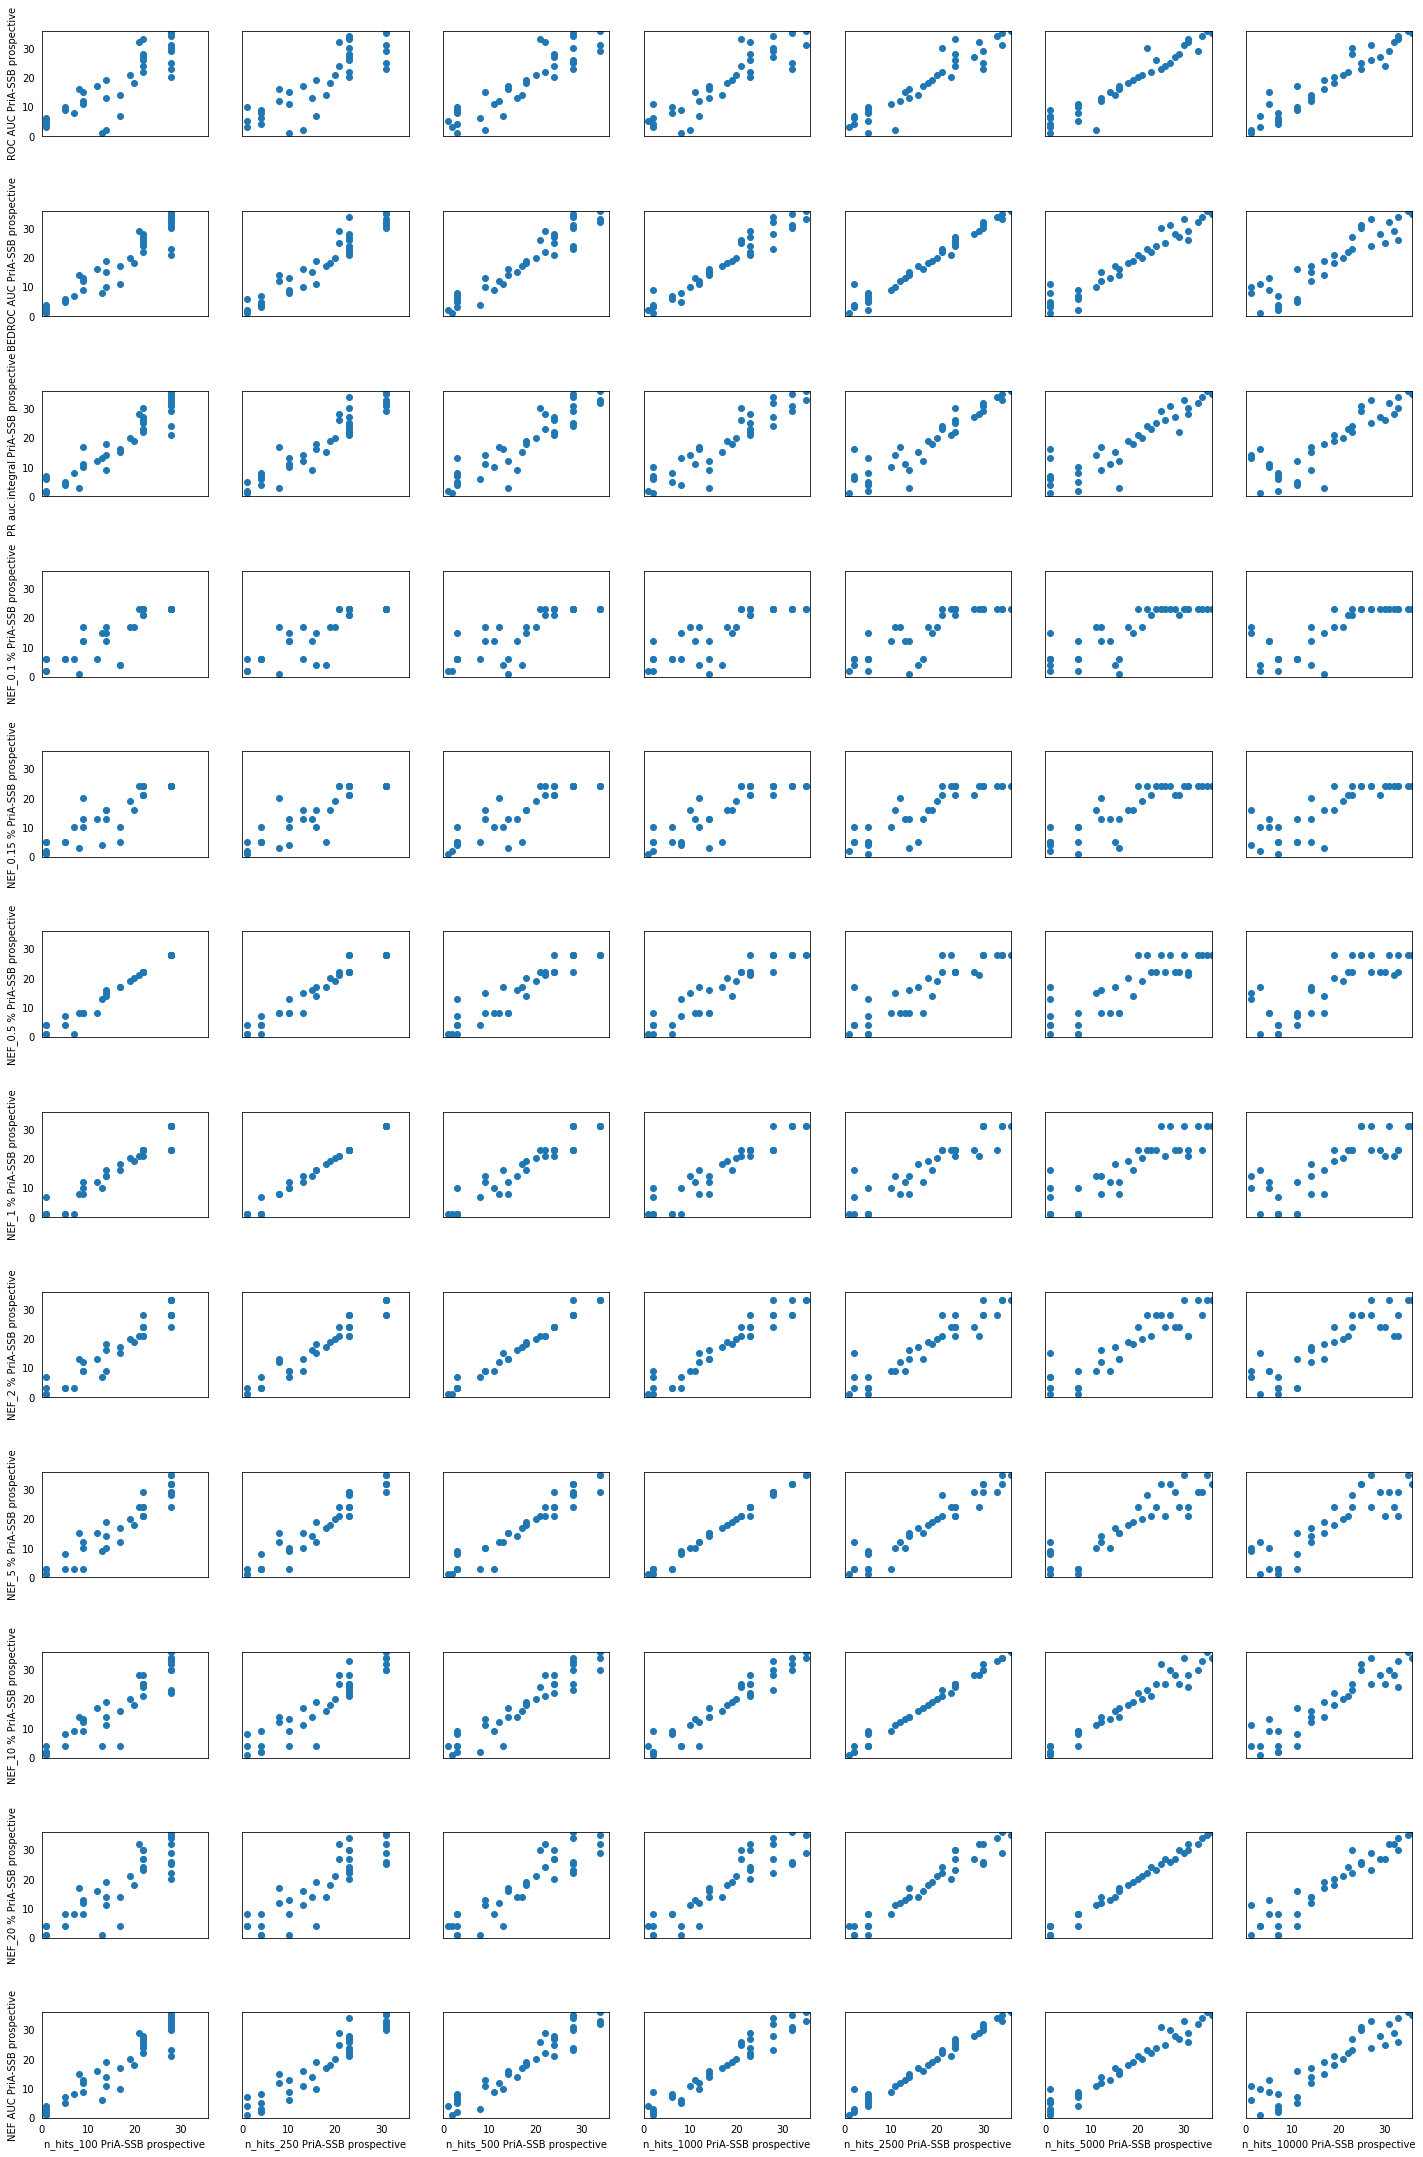

In [10]:
labels=['PriA-SSB prospective']
matplotlib.rcParams.update({'font.size': 10})
if not os.path.exists('./cv_ps_figures/ps_scatter_plots_nhits/'):
    os.makedirs('./cv_ps_figures/ps_scatter_plots_nhits/')
for l in labels:
    curr_metrics = [m for m in metric_names[:-7] if l in m]
    curr_hits = [m for m in metric_names[-7:] if l in m]
    file_name = './cv_ps_figures/ps_scatter_plots_nhits/' + l.replace(' ', '_') + '.png'
    plot_scatter_nhits_alt(agg_comp_dict, curr_metrics, curr_hits, file_name, figsize=(20,30), labels=['PriA-SSB prospective'])

## Metric Scores and Plots

In [11]:
get_model_ordering_mscores(gather_df, metric_names)

,ROC AUC PriA-SSB prospective,BEDROC AUC PriA-SSB prospective,PR auc.integral PriA-SSB prospective,NEF_0.1 % PriA-SSB prospective,NEF_0.15 % PriA-SSB prospective,NEF_0.5 % PriA-SSB prospective,NEF_1 % PriA-SSB prospective,NEF_2 % PriA-SSB prospective,NEF_5 % PriA-SSB prospective,NEF_10 % PriA-SSB prospective,NEF_20 % PriA-SSB prospective,NEF AUC PriA-SSB prospective,n_hits_100 PriA-SSB prospective,n_hits_250 PriA-SSB prospective,n_hits_500 PriA-SSB prospective,n_hits_1000 PriA-SSB prospective,n_hits_2500 PriA-SSB prospective,n_hits_5000 PriA-SSB prospective,n_hits_10000 PriA-SSB prospective
0,"SingleRegression_a, 0.9207","RandomForest_h, 0.7689","RandomForest_h, 0.3793","SingleClassification_b, 0.6364","RandomForest_g, 0.6061","RandomForest_a, 0.5556","RandomForest_a, 0.6667","RandomForest_g, 0.7222","RandomForest_g, 0.7778","RandomForest_h, 0.8333","SingleRegression_a, 0.8519","RandomForest_h, 0.7919","RandomForest_d, 29.0","RandomForest_b, 37.0","RandomForest_g, 40.0","RandomForest_g, 42.0","RandomForest_h, 45.0","SingleRegression_a, 46.0","SingleRegression_b, 50.0"
1,"SingleRegression_b, 0.8971","RandomForest_g, 0.7655","RandomForest_g, 0.3689","RandomForest_g, 0.5455","RandomForest_h, 0.5758","RandomForest_g, 0.5556","RandomForest_b, 0.6667","RandomForest_h, 0.7222","RandomForest_h, 0.7778","RandomForest_d, 0.8148","RandomForest_d, 0.8519","RandomForest_e, 0.782","RandomForest_e, 29.0","RandomForest_g, 37.0","RandomForest_h, 39.0","RandomForest_d, 41.0","RandomForest_d, 44.0","RandomForest_c, 46.0","SingleRegression_a, 50.0"
2,"RandomForest_h, 0.8969","RandomForest_e, 0.7569","SingleClassification_b, 0.3047","RandomForest_h, 0.5455","SingleClassification_b, 0.5455","RandomForest_h, 0.5556","RandomForest_c, 0.6667","RandomForest_a, 0.7037","RandomForest_a, 0.7593","RandomForest_e, 0.8148","RandomForest_e, 0.8519","RandomForest_d, 0.7794","RandomForest_g, 29.0","RandomForest_h, 37.0","RandomForest_a, 38.0","RandomForest_e, 41.0","RandomForest_e, 44.0","RandomForest_d, 46.0","RandomForest_f, 49.0"
3,"RandomForest_e, 0.8901","RandomForest_d, 0.7552","RandomForest_c, 0.2865","MultiClassification_a, 0.5","SingleRegression_a, 0.4545","RandomForest_b, 0.537","RandomForest_e, 0.6667","RandomForest_b, 0.7037","RandomForest_b, 0.7593","SingleRegression_a, 0.7963","RandomForest_c, 0.8333","RandomForest_g, 0.7783","RandomForest_h, 29.0","RandomForest_a, 36.0","SingleRegression_a, 38.0","RandomForest_h, 41.0","RandomForest_f, 44.0","RandomForest_e, 46.0","RandomForest_h, 49.0"
4,"RandomForest_g, 0.889","RandomForest_c, 0.7443","RandomForest_b, 0.2853","RandomForest_f, 0.5","RandomForest_c, 0.4242","RandomForest_d, 0.537","RandomForest_g, 0.6667","RandomForest_c, 0.7037","RandomForest_d, 0.7593","RandomForest_c, 0.7963","RandomForest_f, 0.8333","RandomForest_c, 0.7663","RandomForest_b, 28.0","RandomForest_c, 36.0","RandomForest_b, 38.0","IRV_e, 41.0","RandomForest_a, 43.0","RandomForest_f, 46.0","IRV_d, 48.0"
5,"RandomForest_d, 0.8868","RandomForest_b, 0.7429","RandomForest_d, 0.2843","RandomForest_a, 0.4545","RandomForest_d, 0.4242","RandomForest_e, 0.537","RandomForest_h, 0.6667","RandomForest_e, 0.7037","RandomForest_e, 0.7593","RandomForest_f, 0.7963","RandomForest_g, 0.8333","SingleRegression_a, 0.7591","RandomForest_c, 28.0","RandomForest_d, 36.0","RandomForest_c, 38.0","RandomForest_a, 40.0","SingleRegression_a, 43.0","RandomForest_h, 46.0","IRV_e, 48.0"
6,"RandomForest_f, 0.8811","RandomForest_a, 0.7365","RandomForest_e, 0.282","RandomForest_b, 0.4545","RandomForest_e, 0.4242","RandomForest_c, 0.5185","RandomForest_d, 0.6481","SingleRegression_a, 0.6852","IRV_e, 0.7593","RandomForest_g, 0.7963","RandomForest_h, 0.8333","RandomForest_b, 0.7588","RandomForest_a, 27.0","RandomForest_e, 36.0","RandomForest_e, 38.0","RandomForest_b, 40.0","RandomForest_b, 43.0","RandomForest_a, 45.0","RandomForest_d, 47.0"
7,"RandomForest_a, 0.8758","SingleRegression_a, 0.7342","RandomForest_a, 0.2816","RandomForest_c, 0.4545","RandomForest_b, 0.4242"

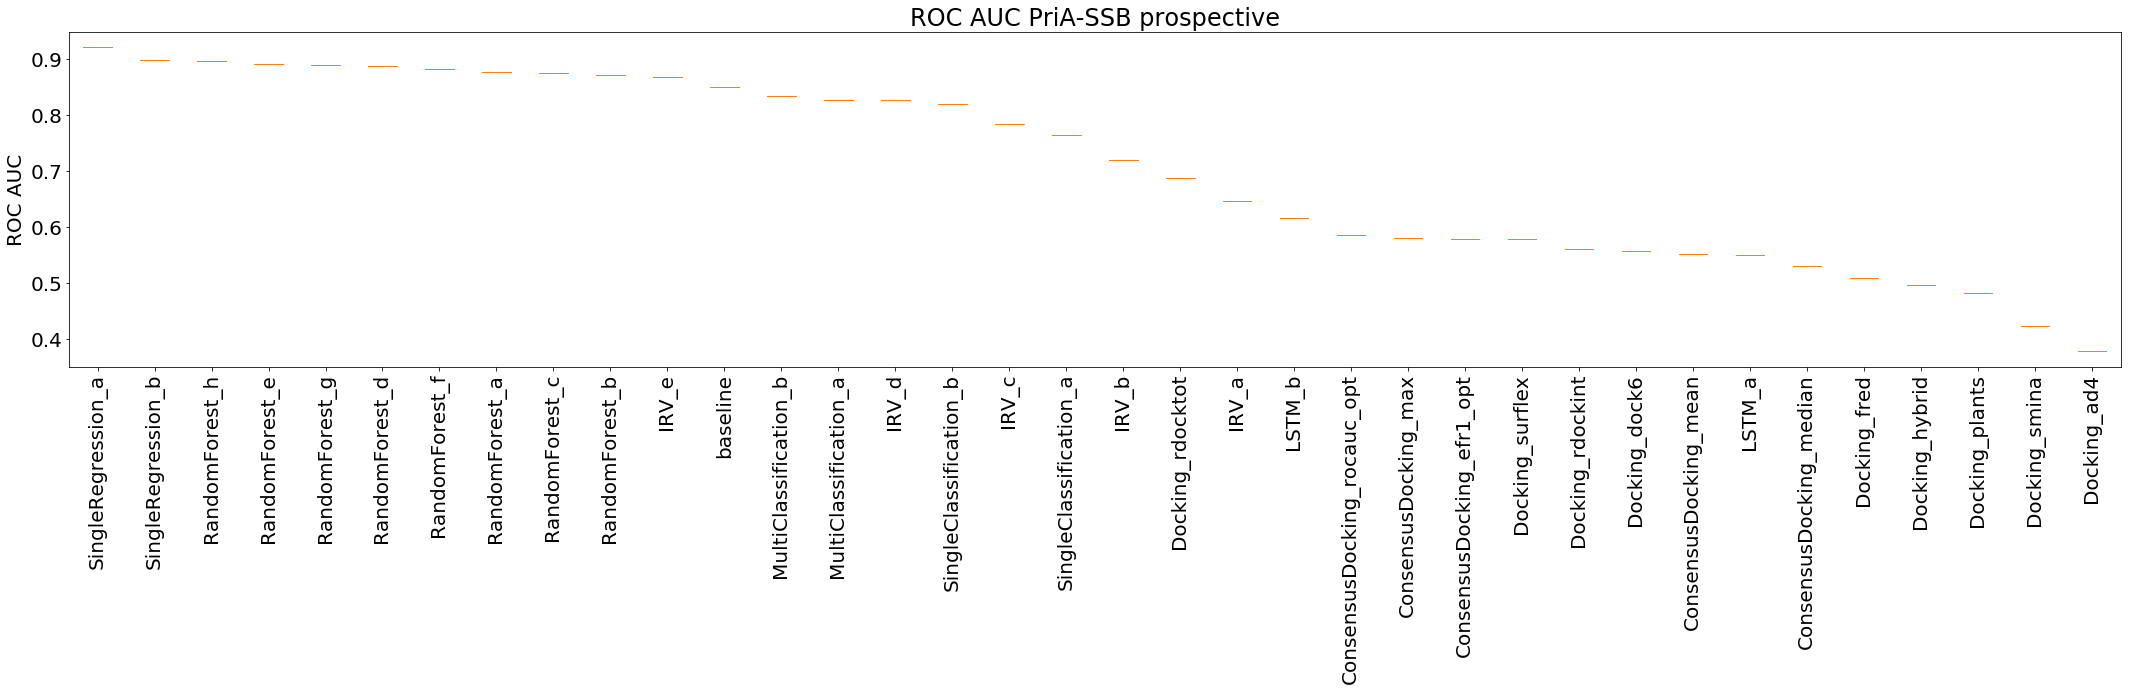

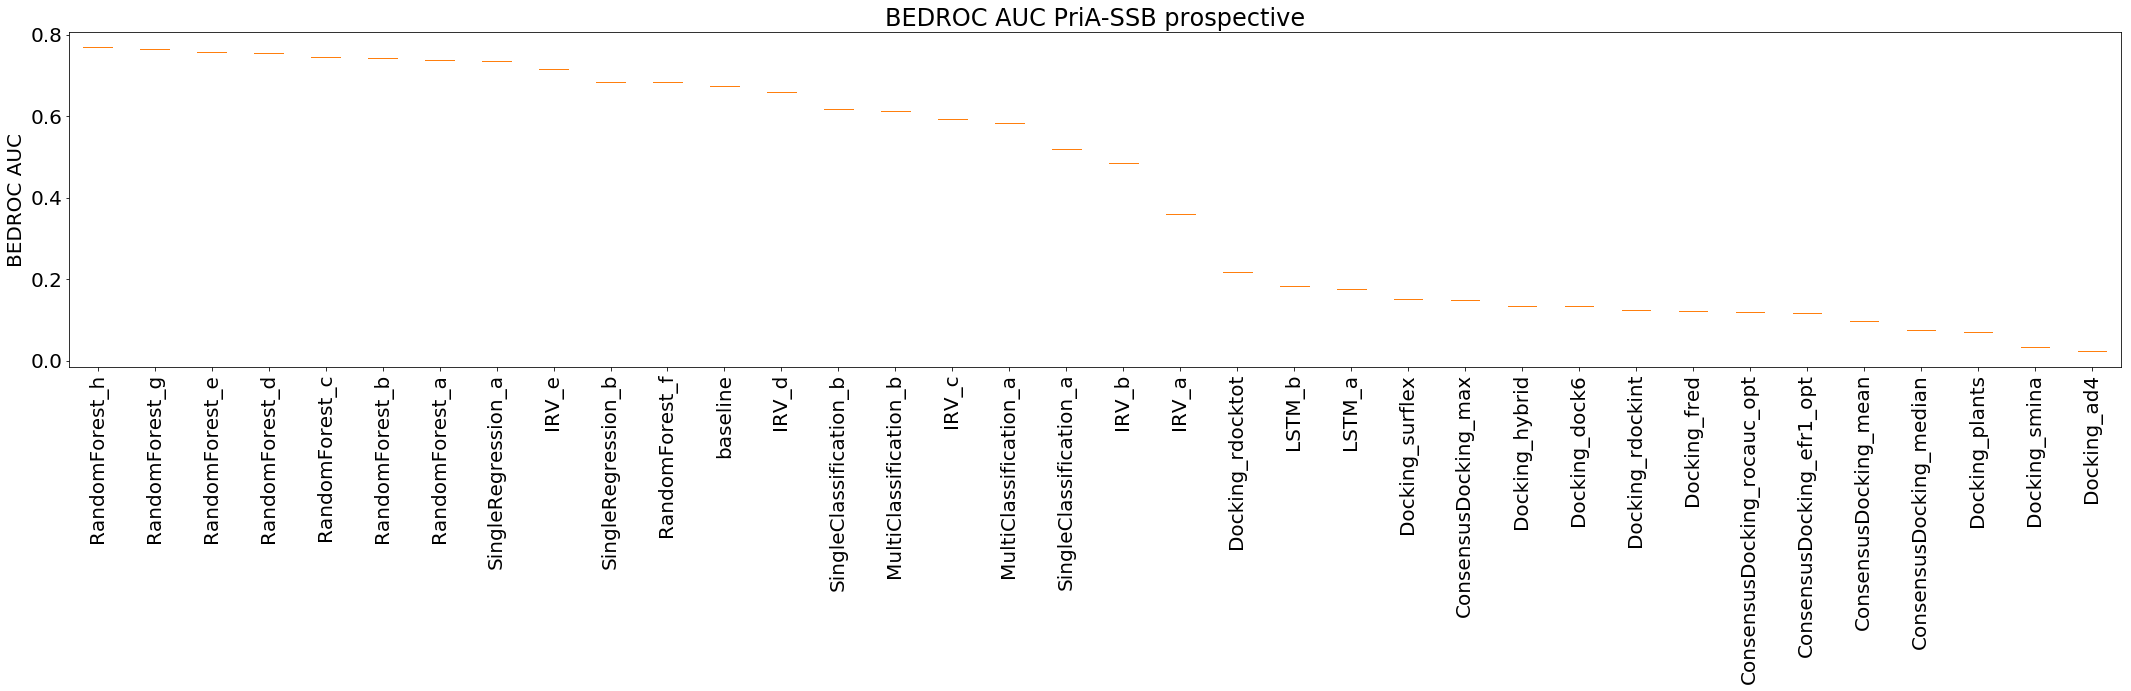

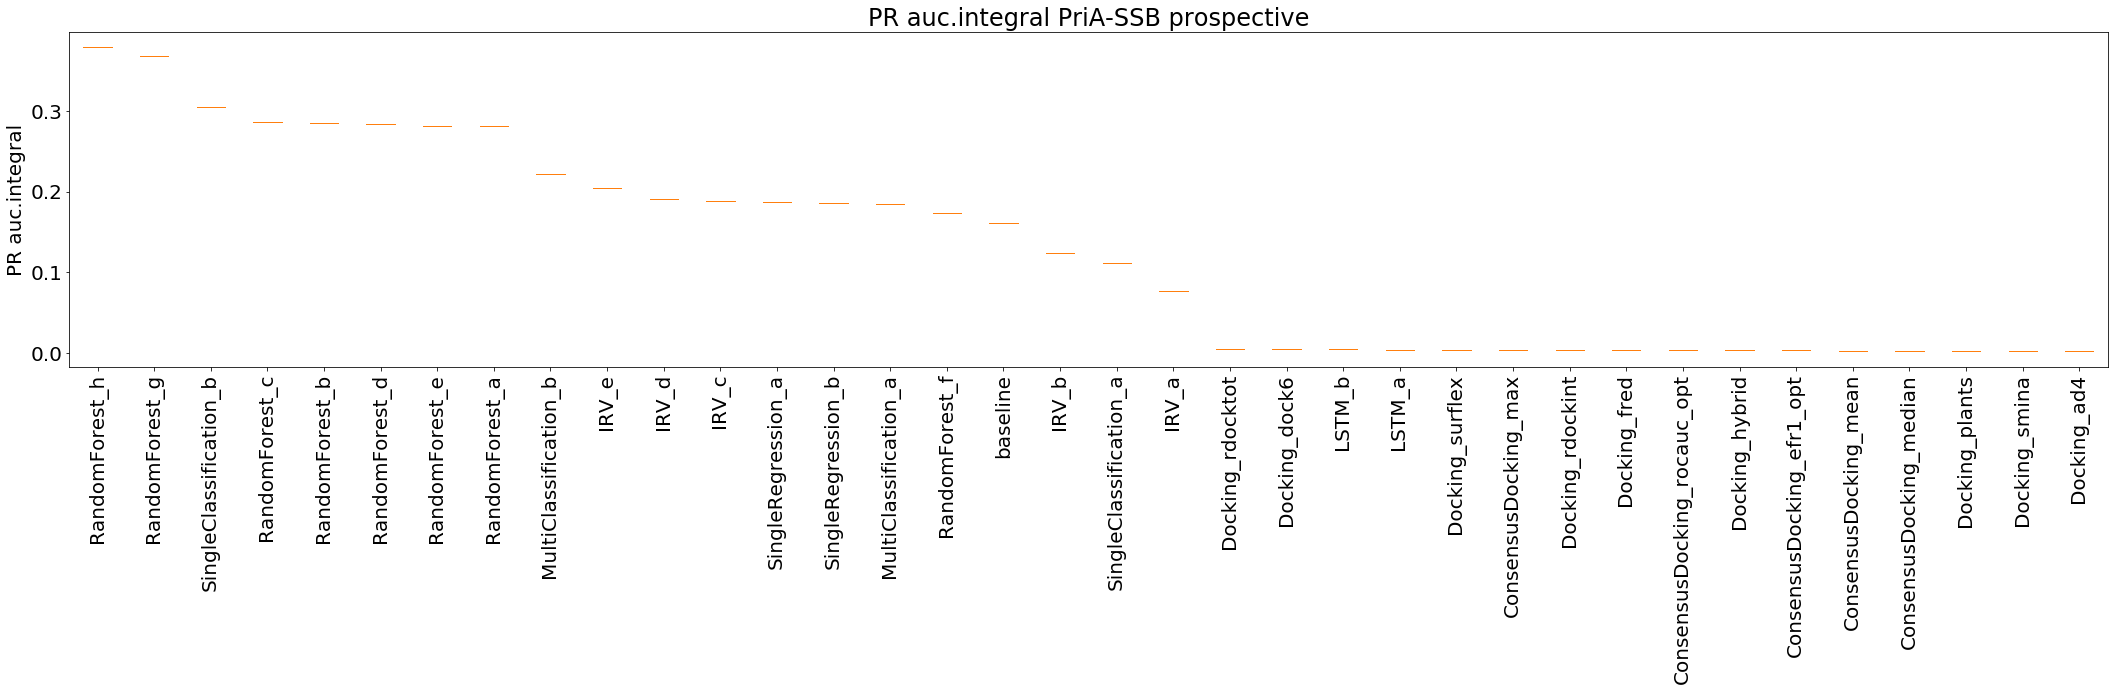

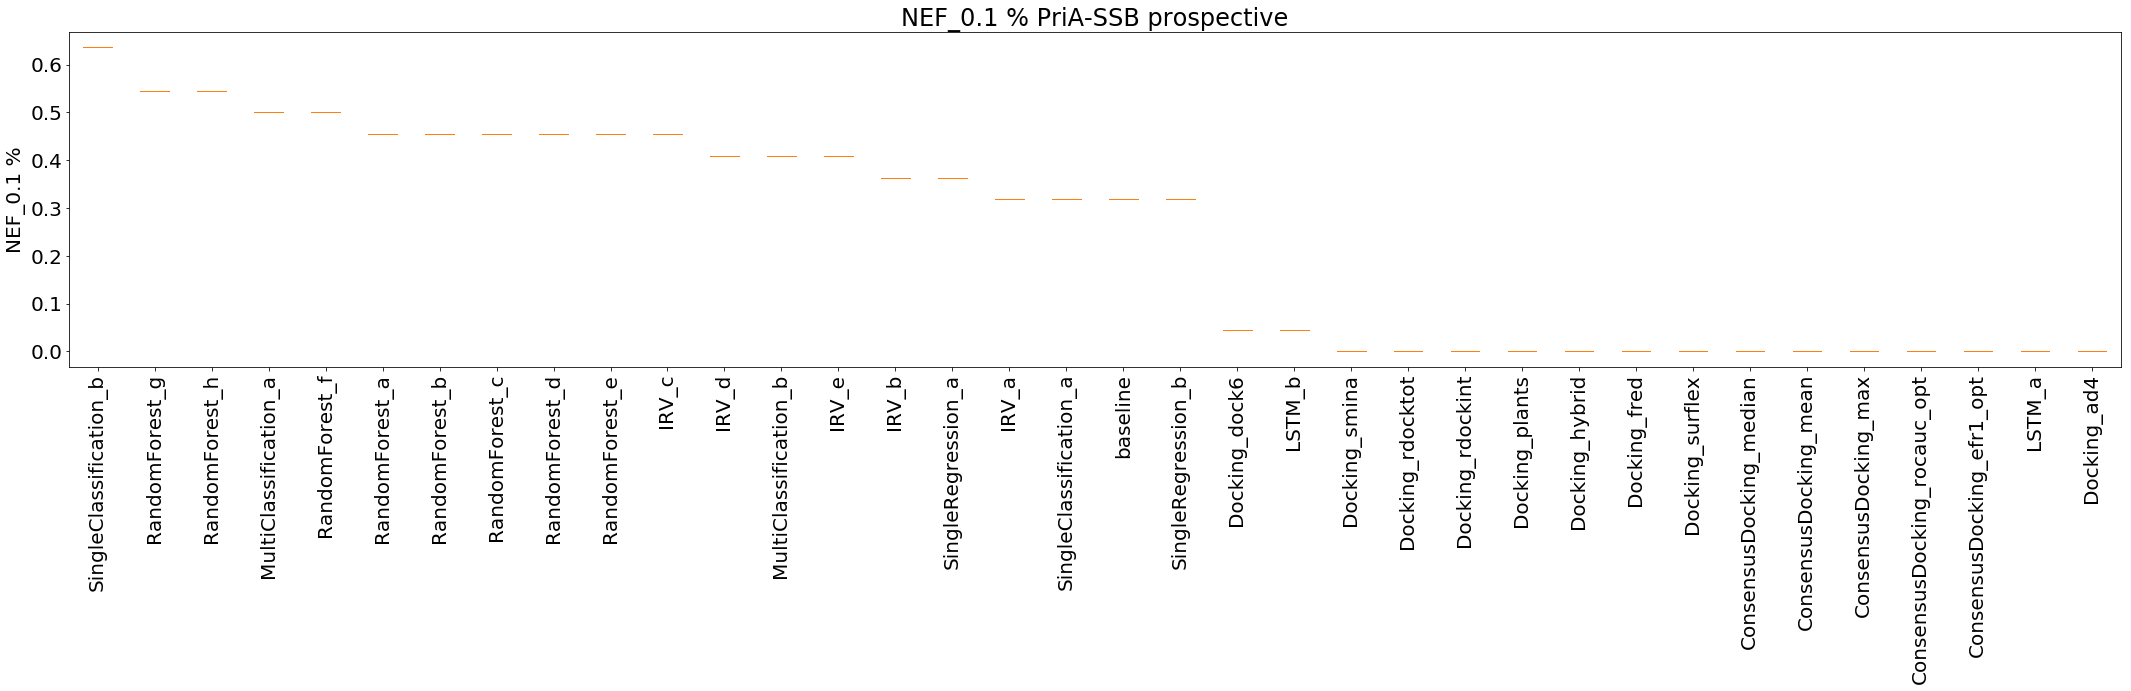

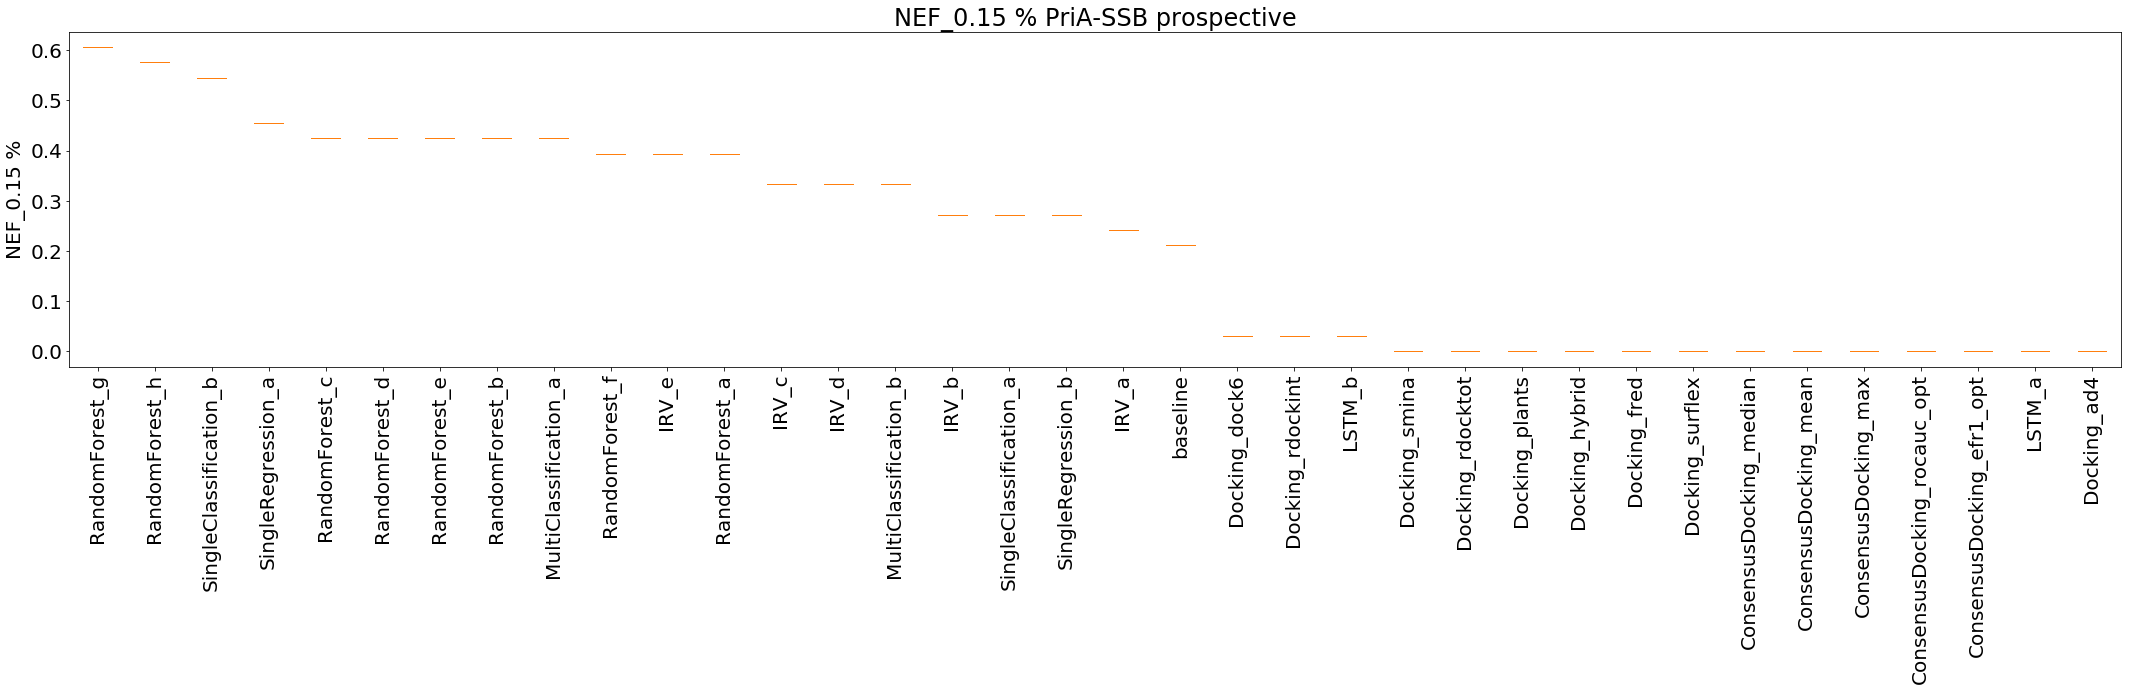

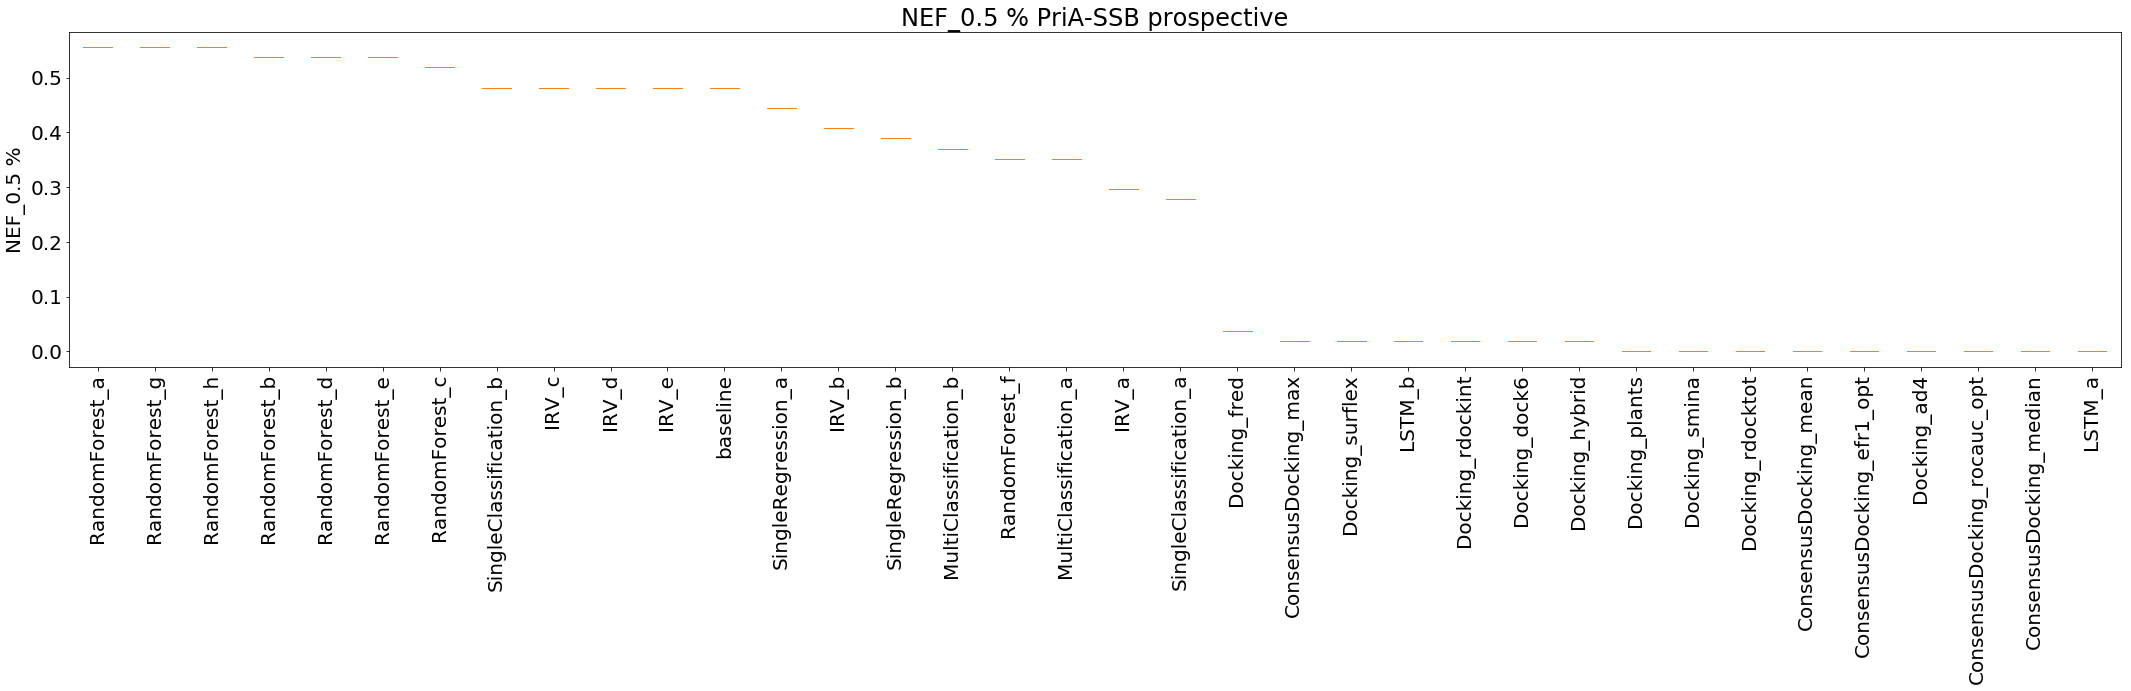

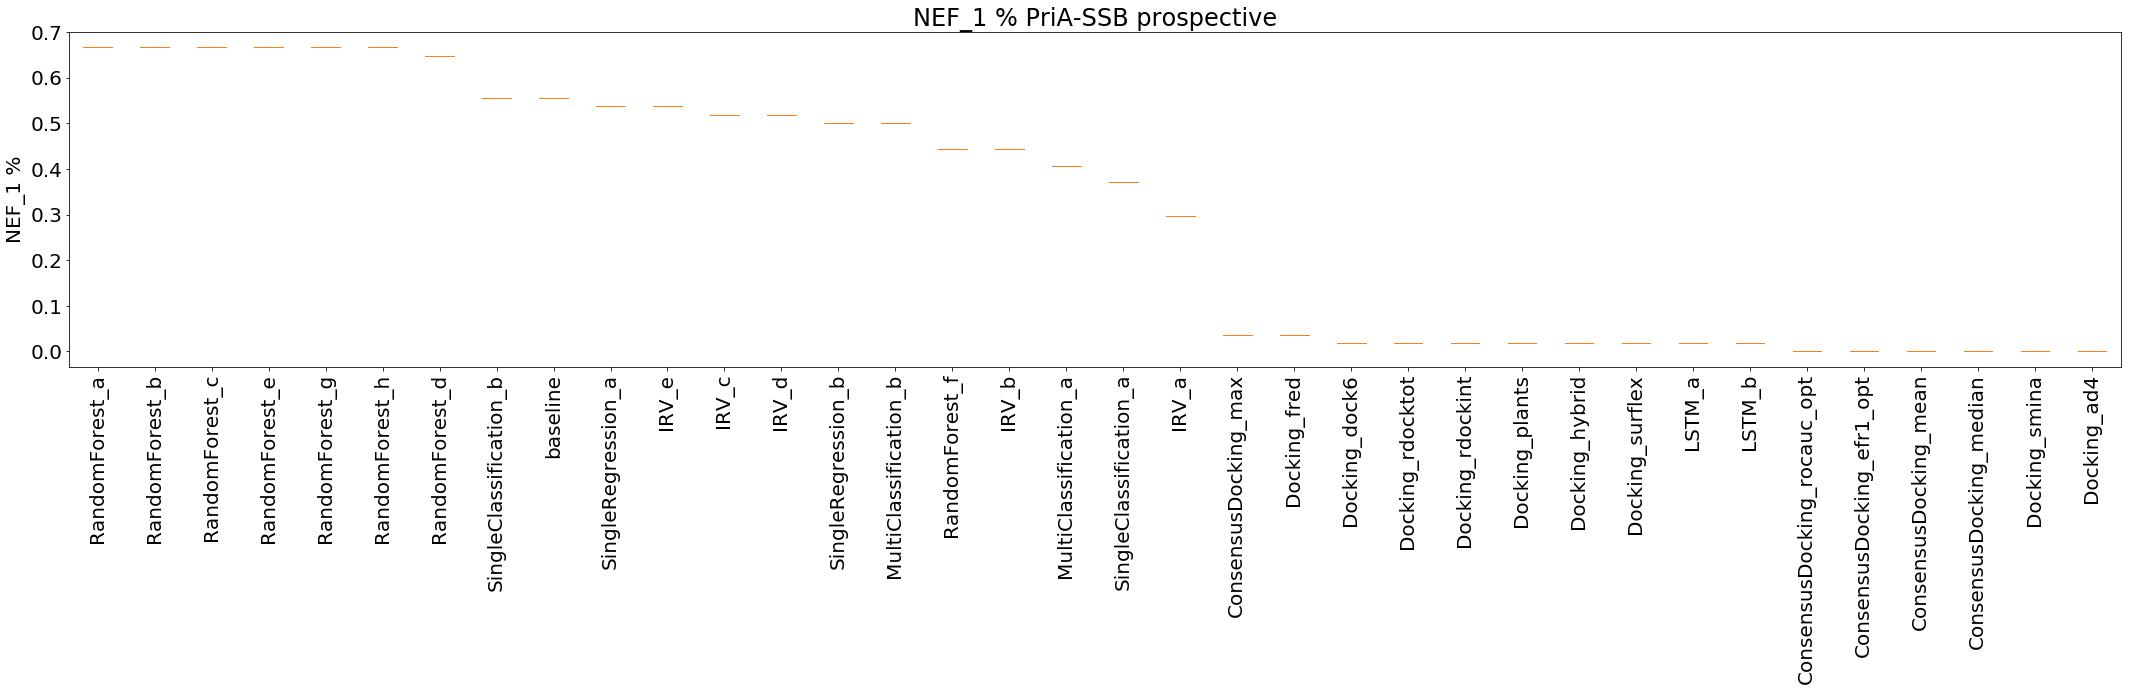

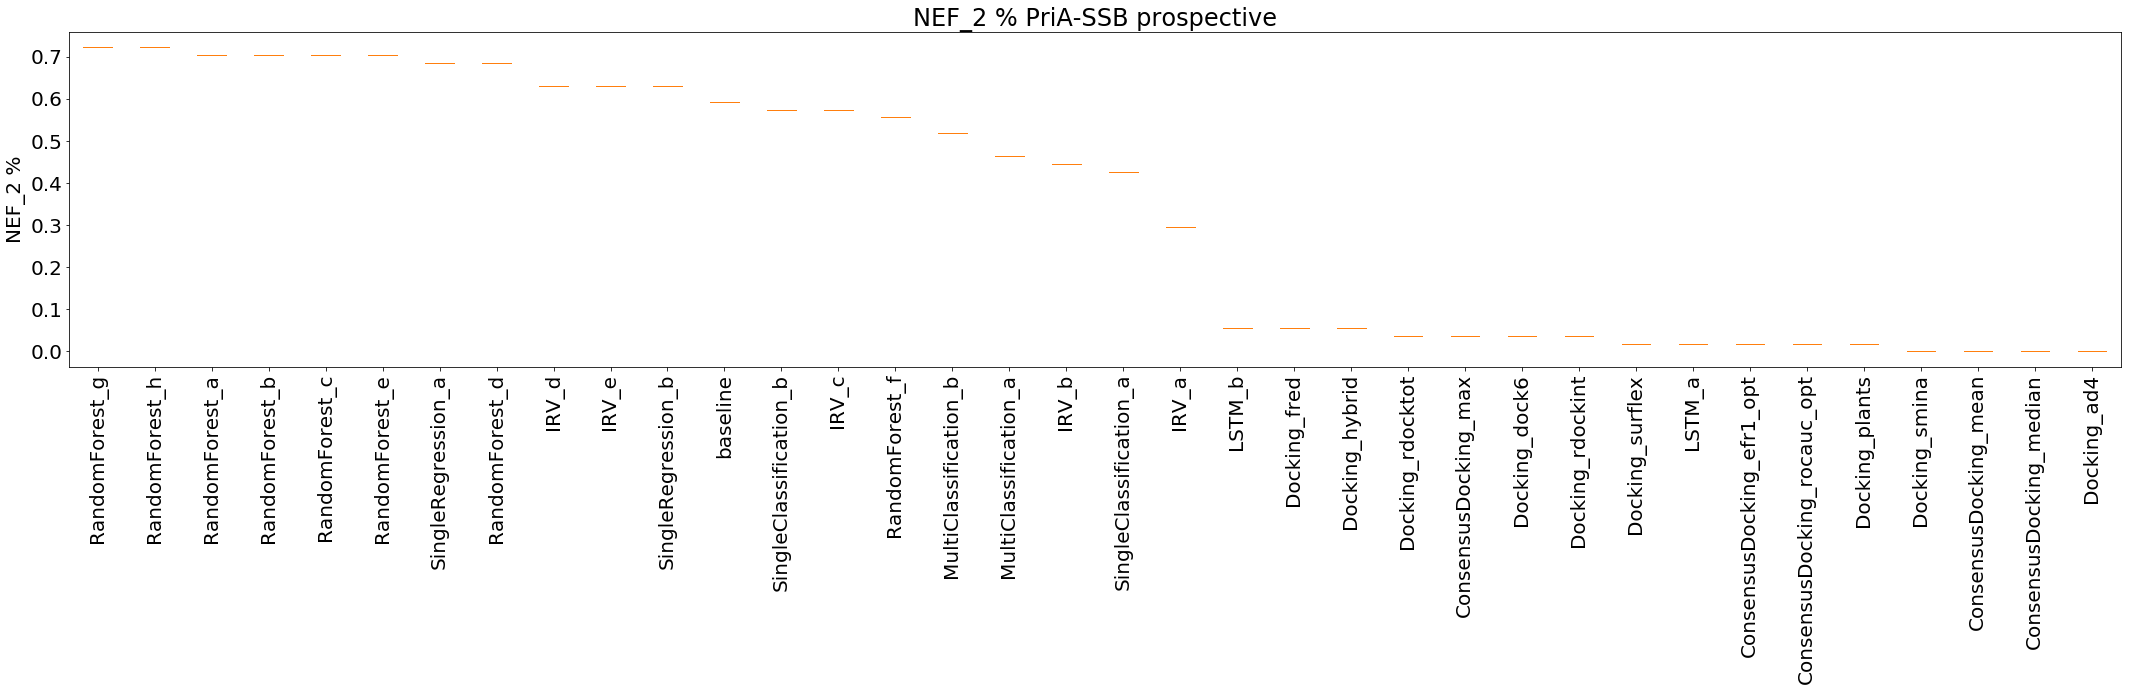

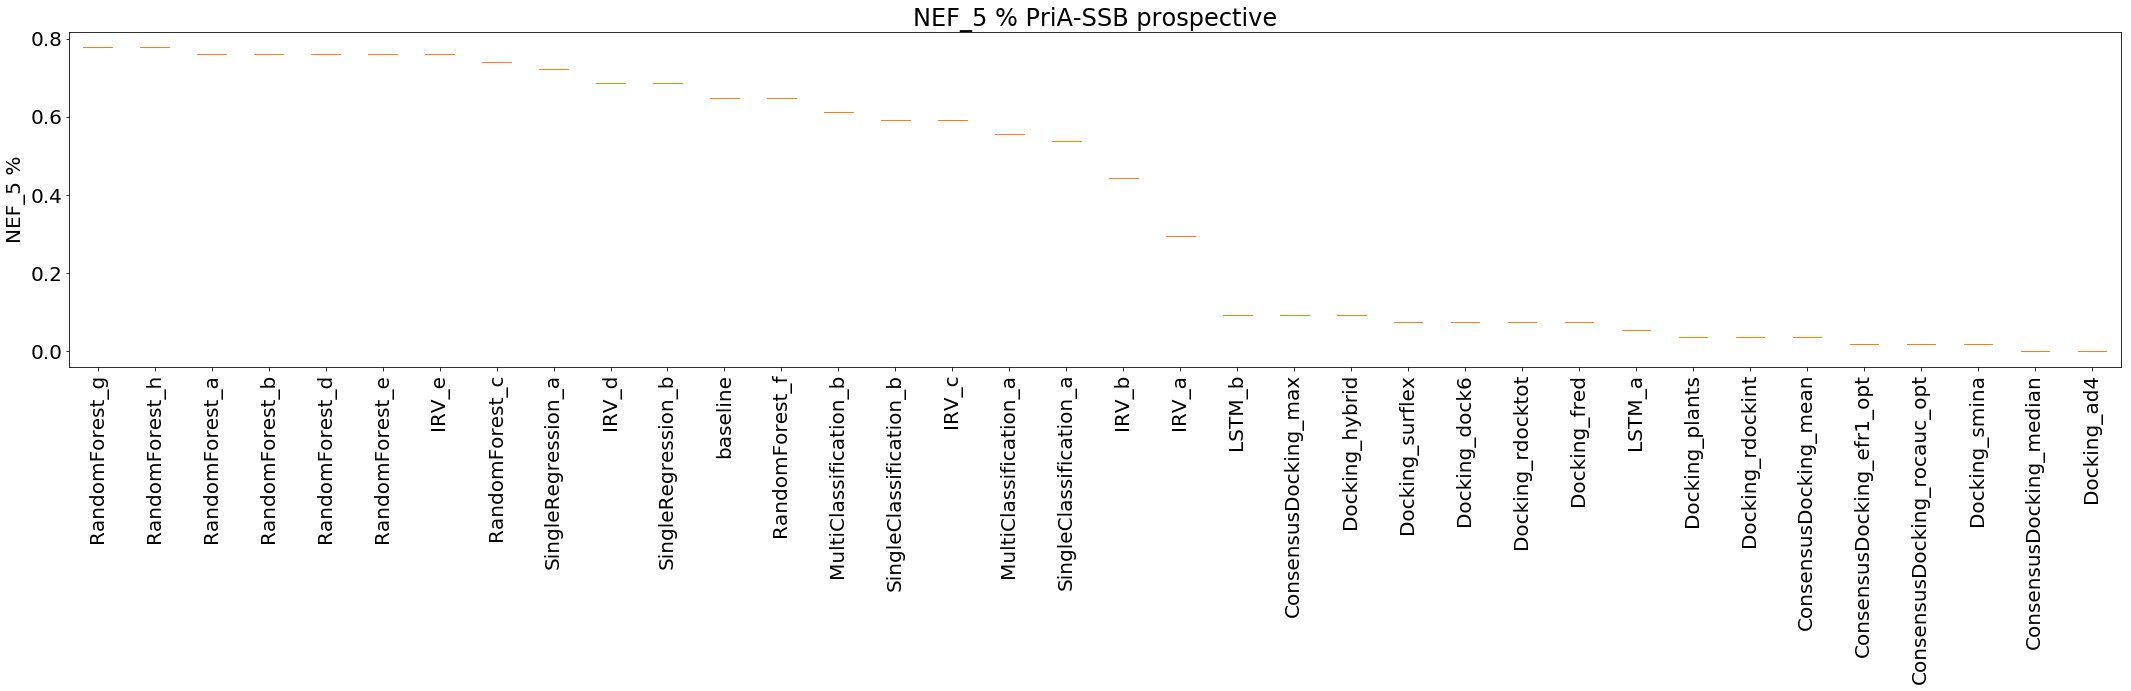

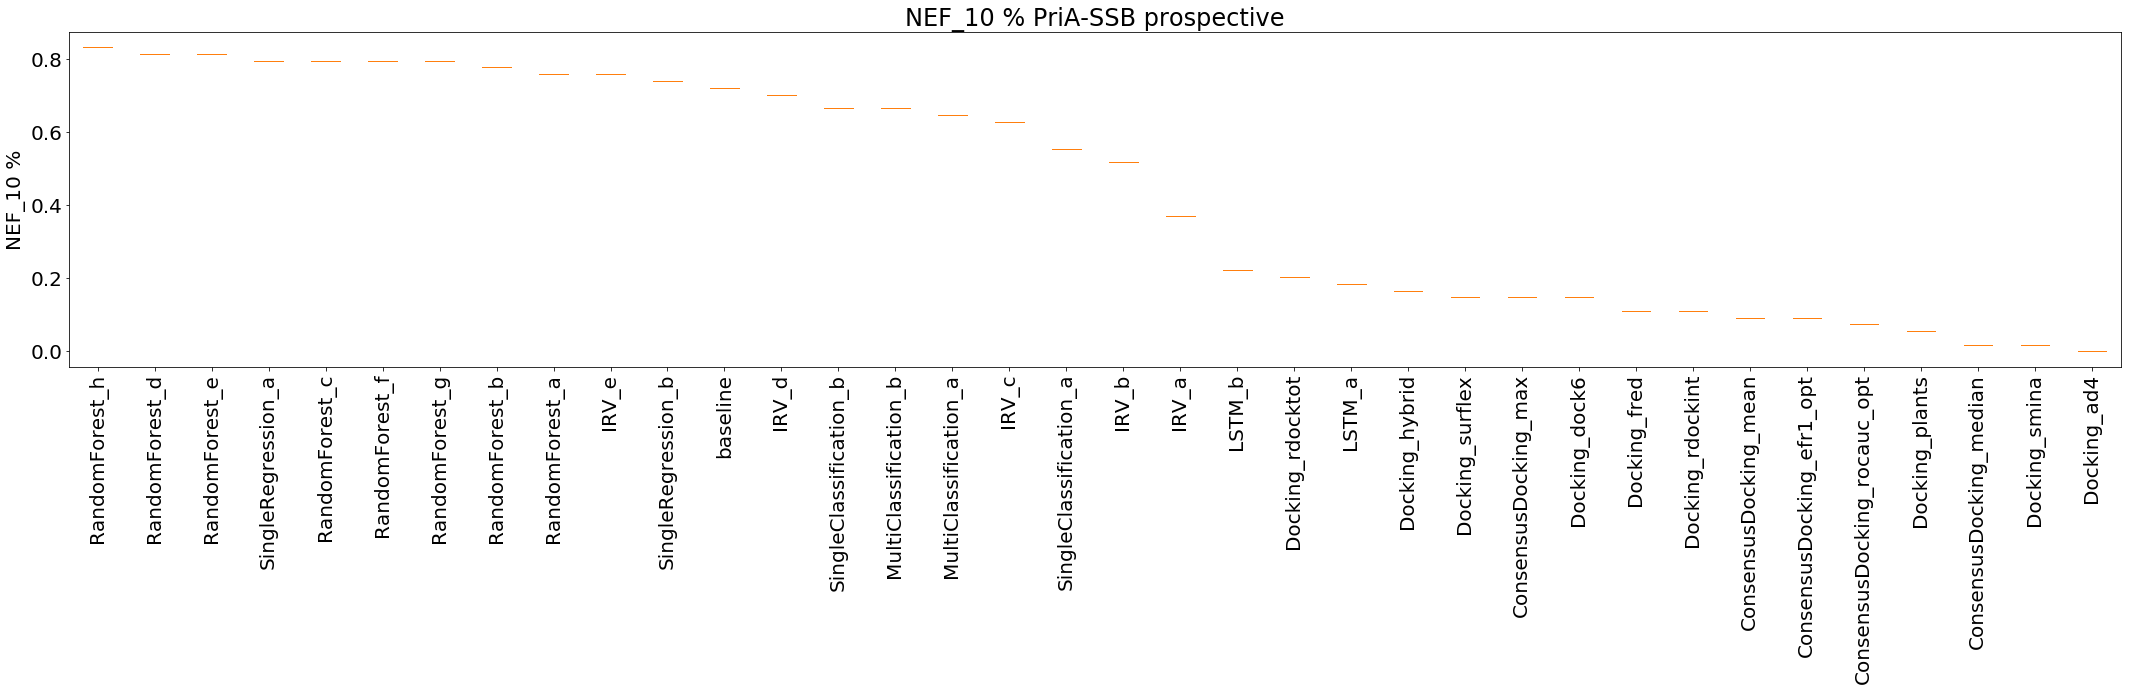

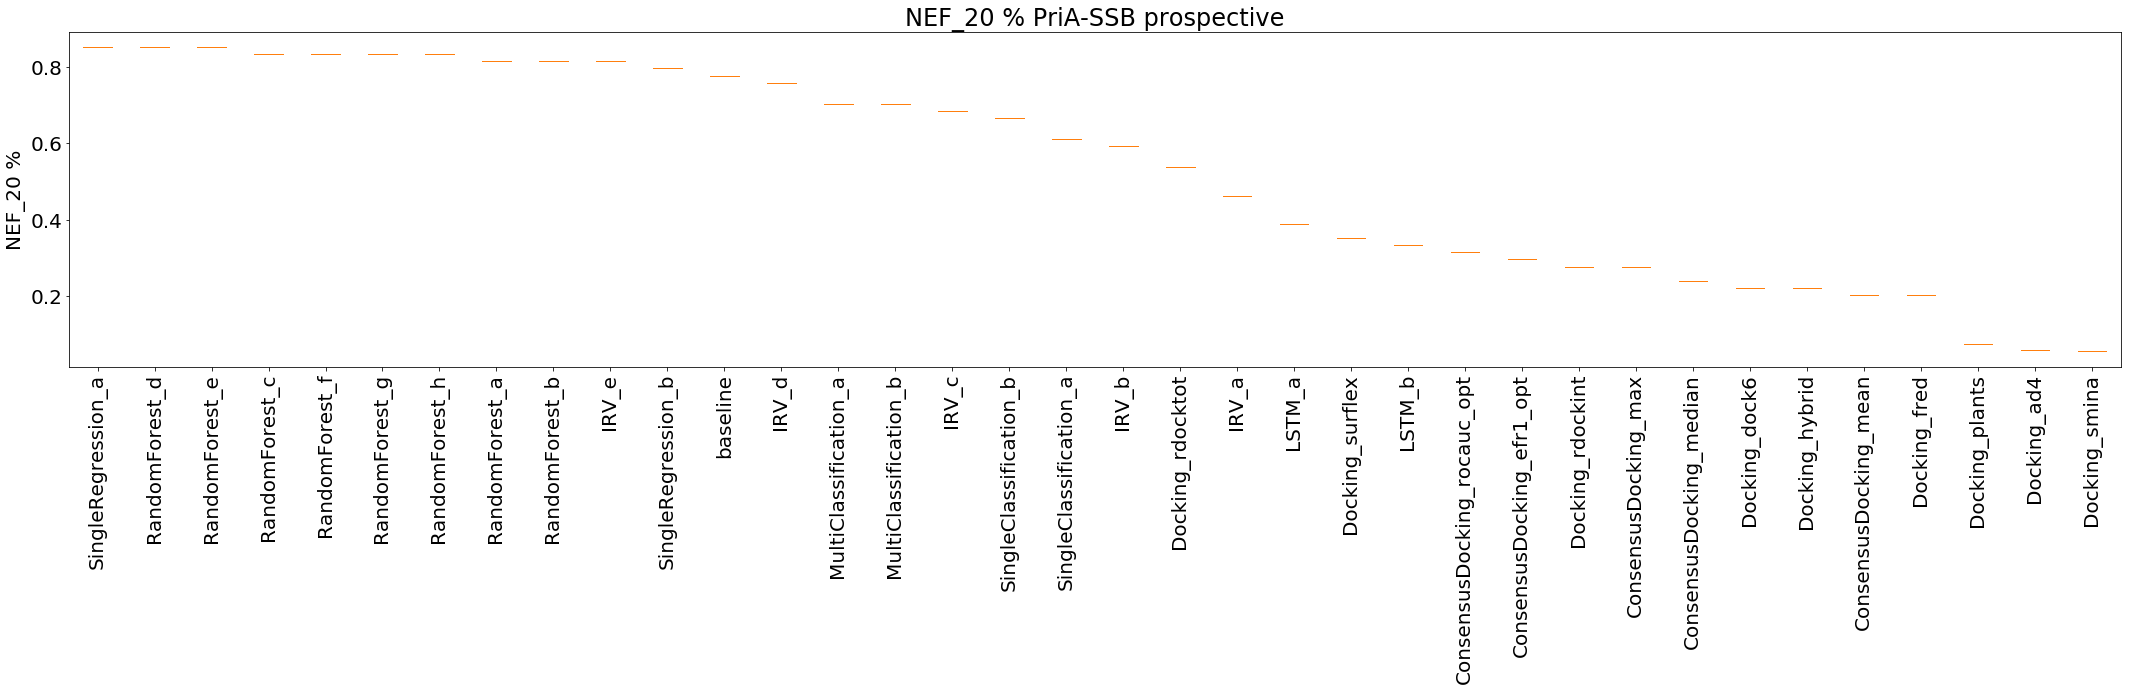

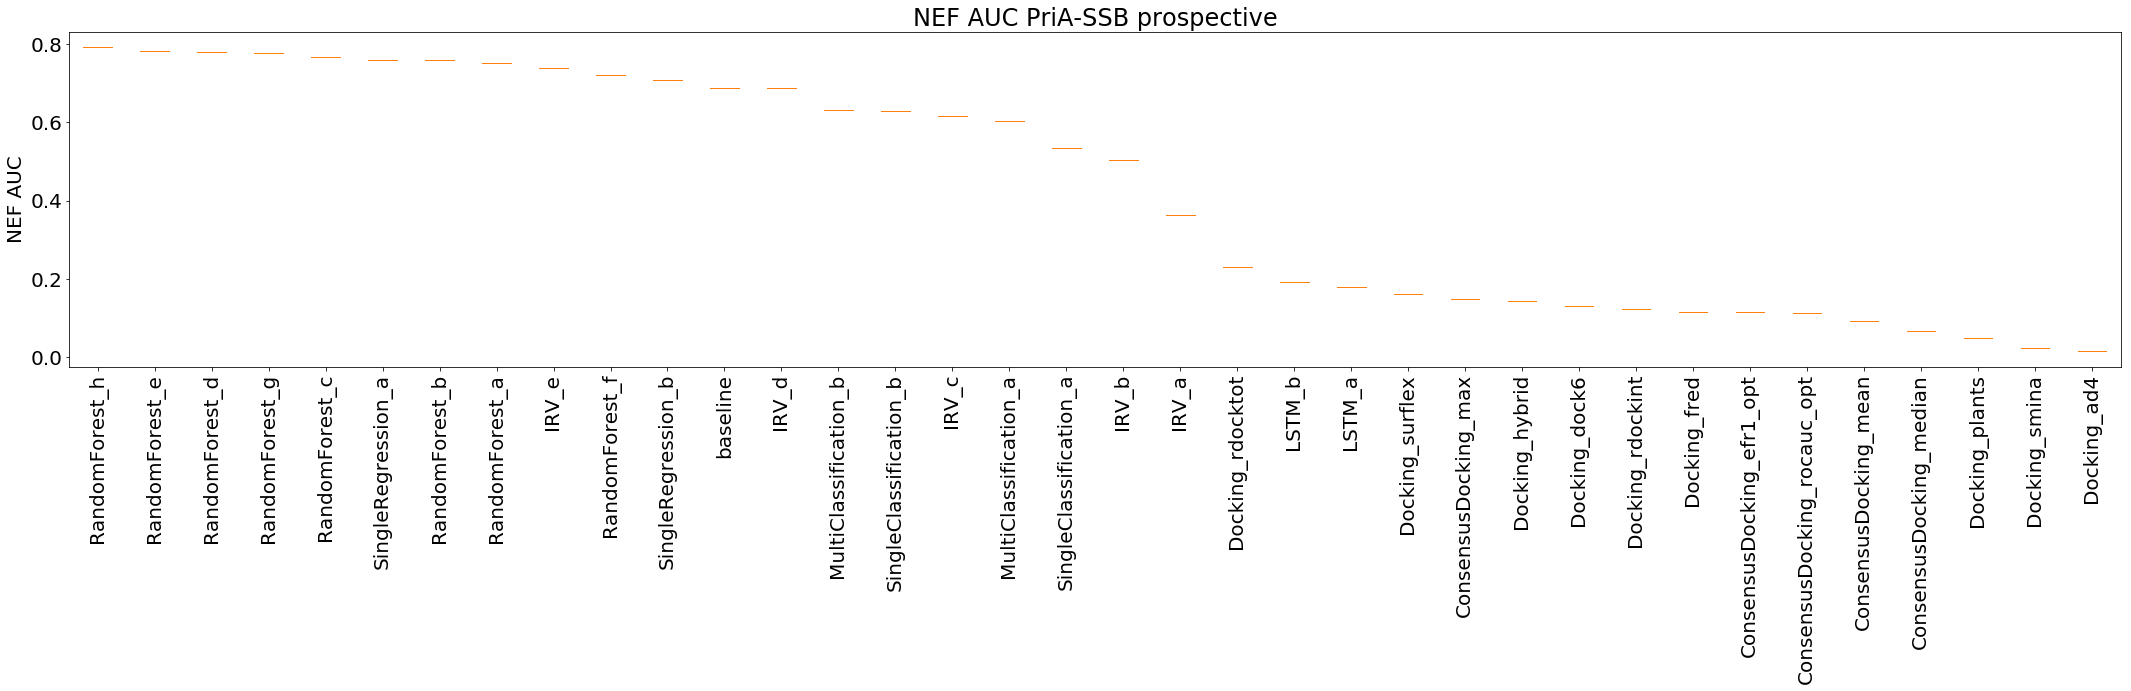

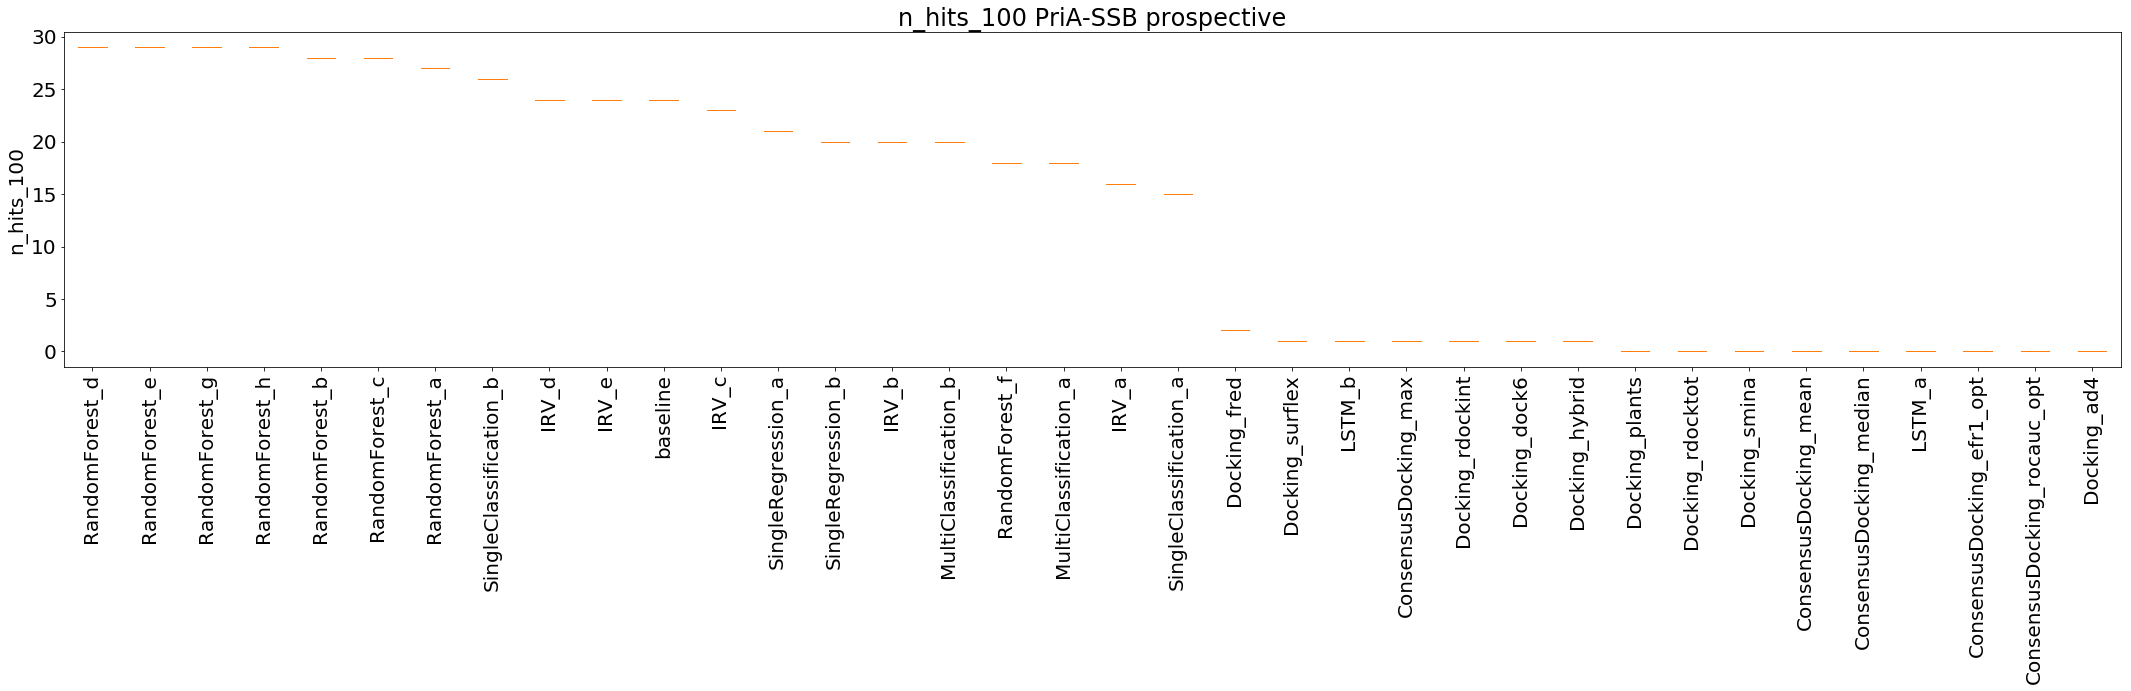

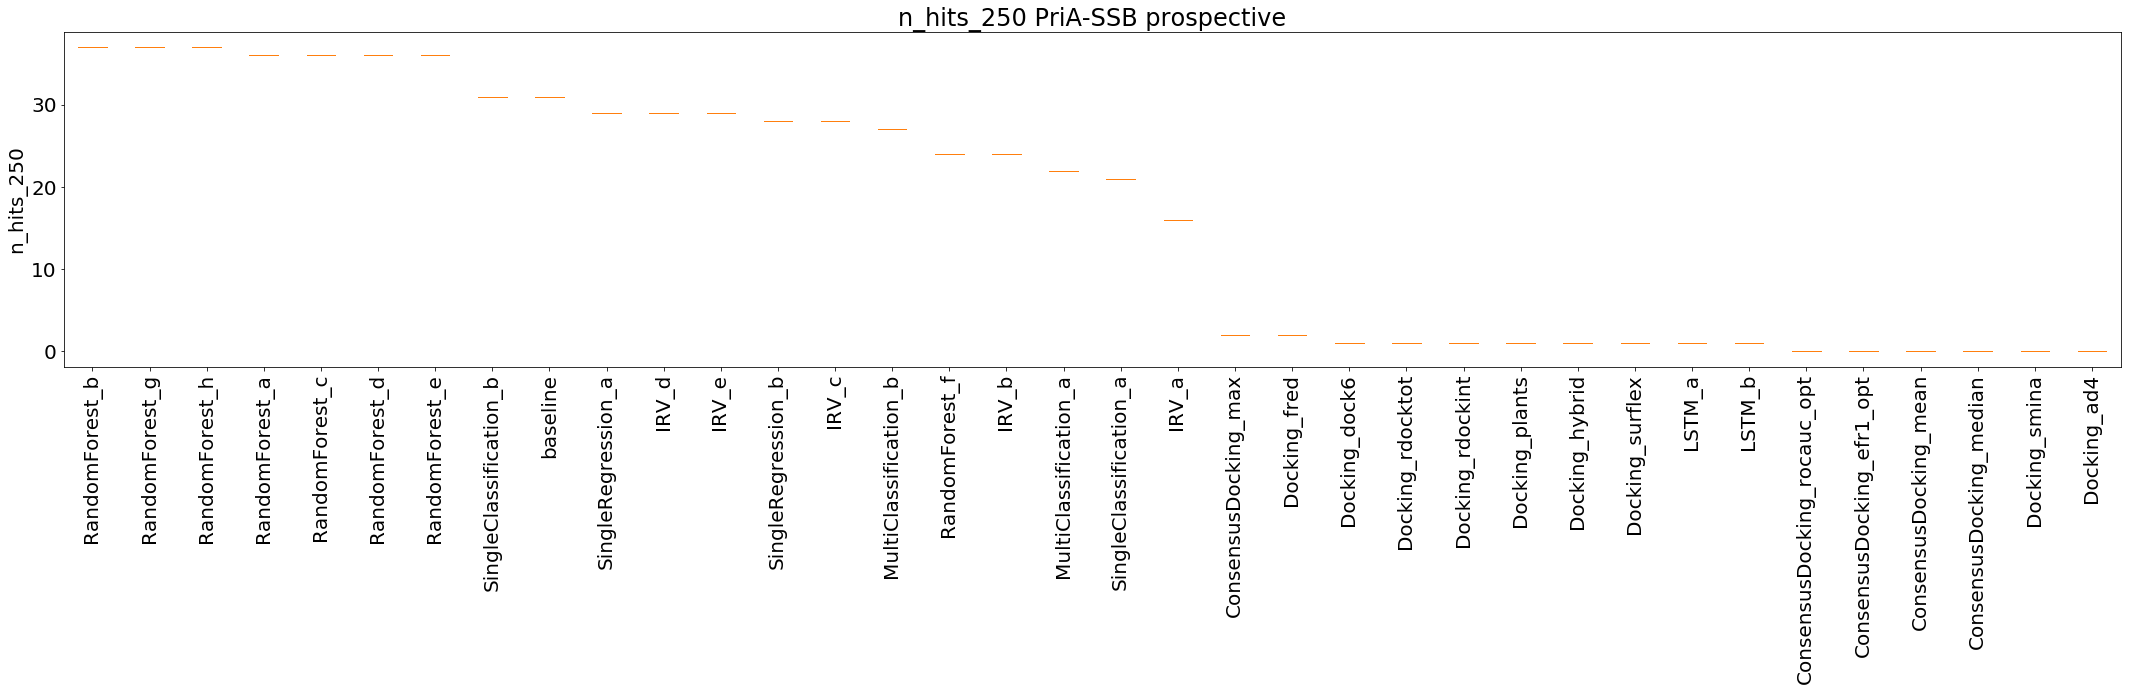

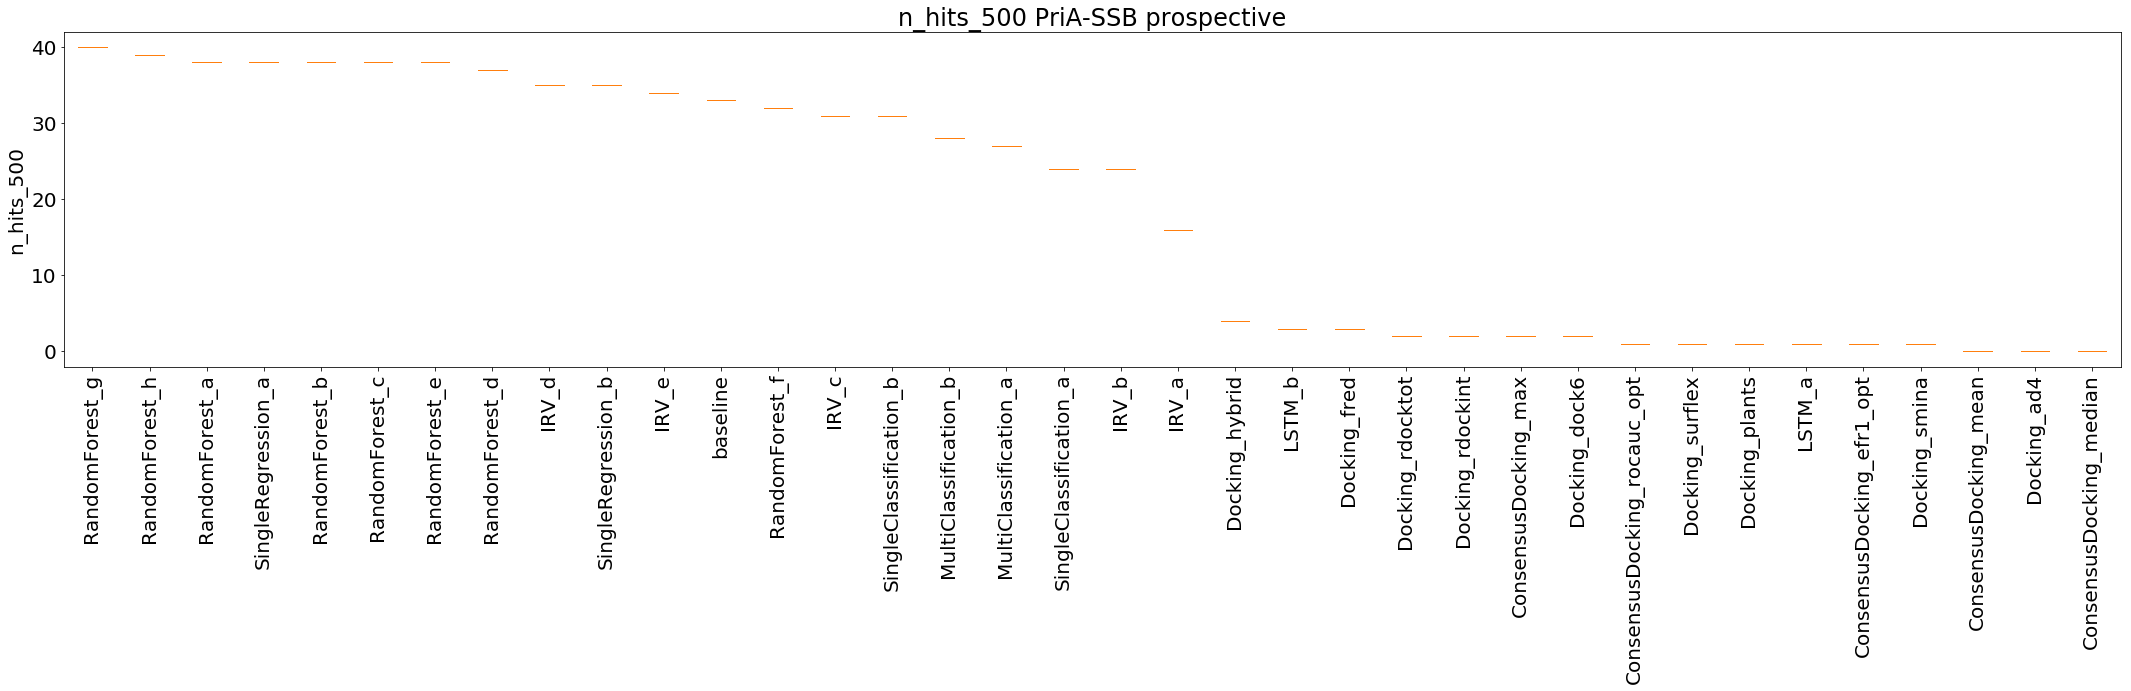

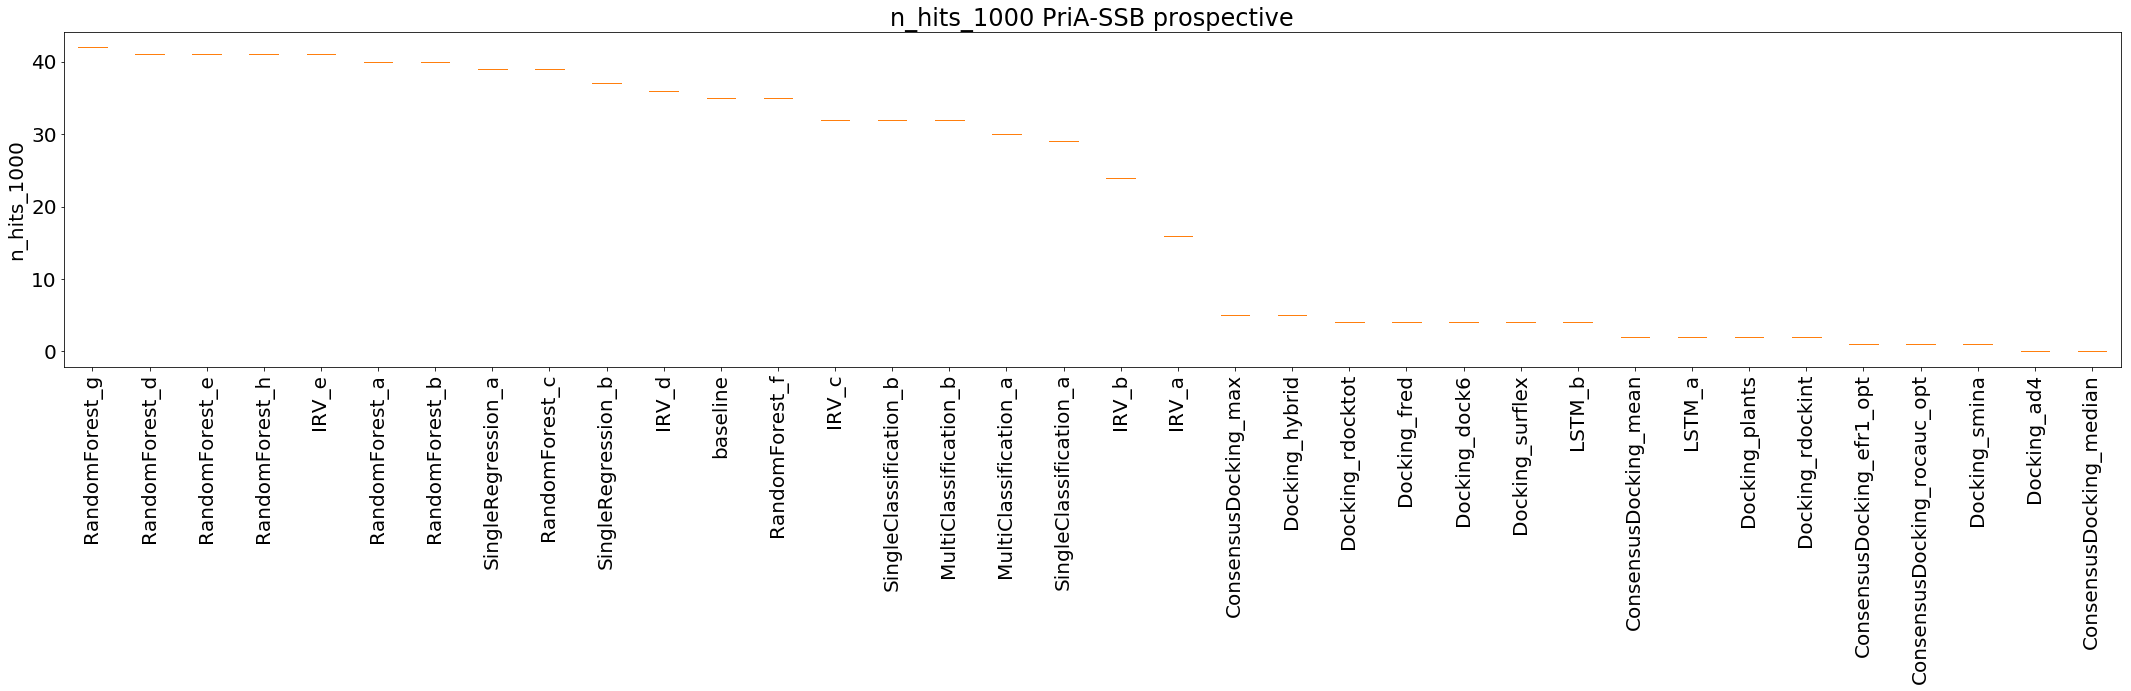

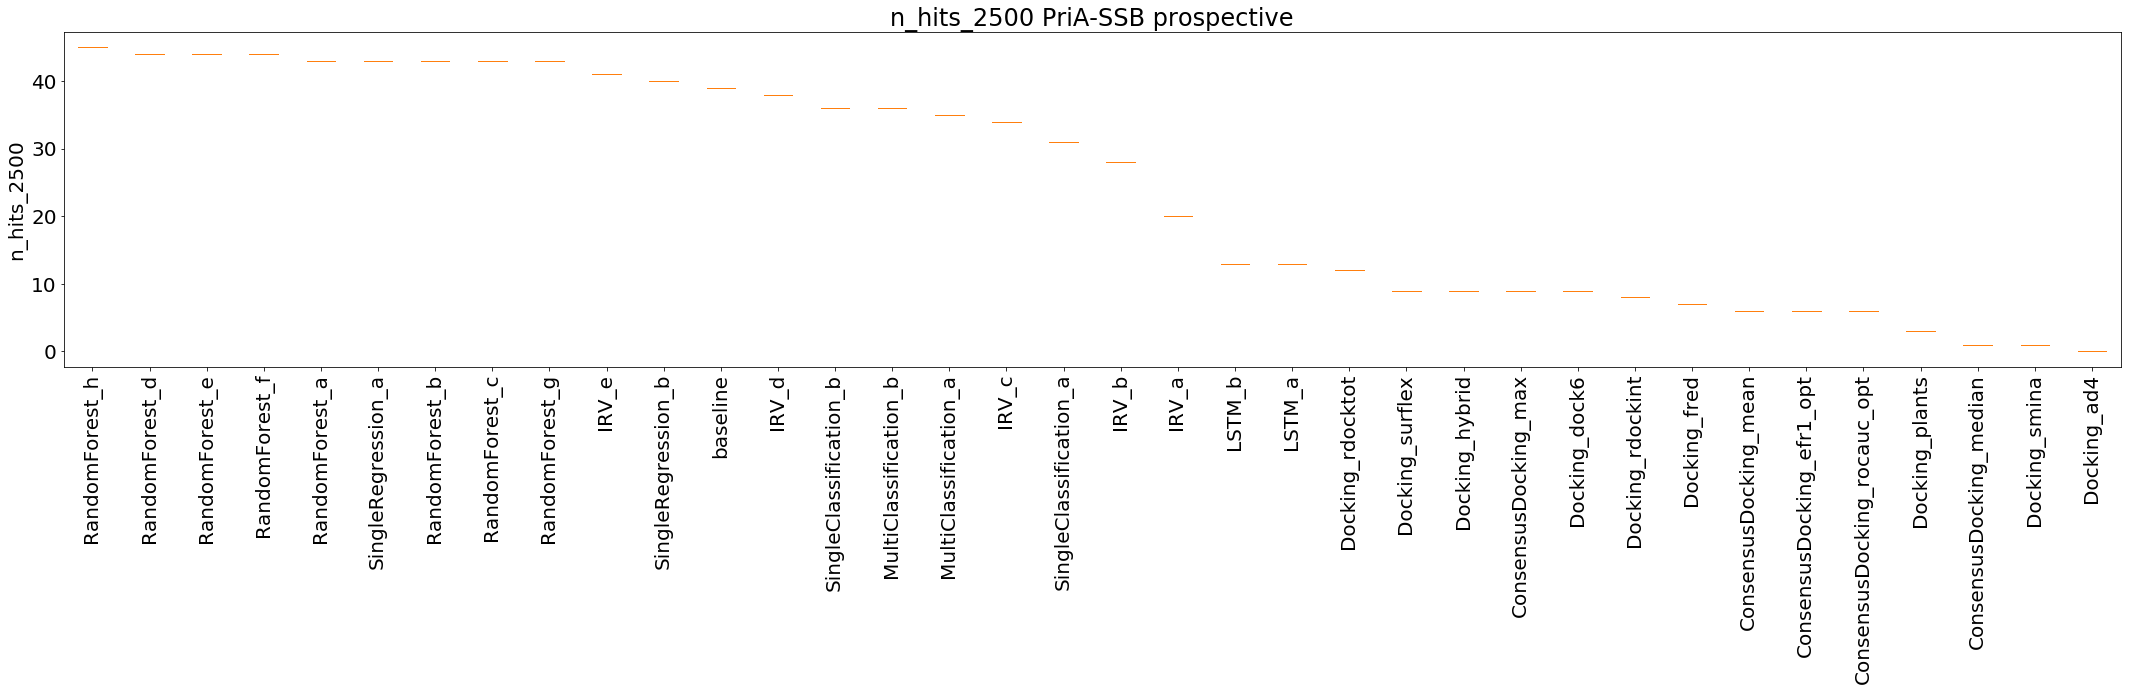

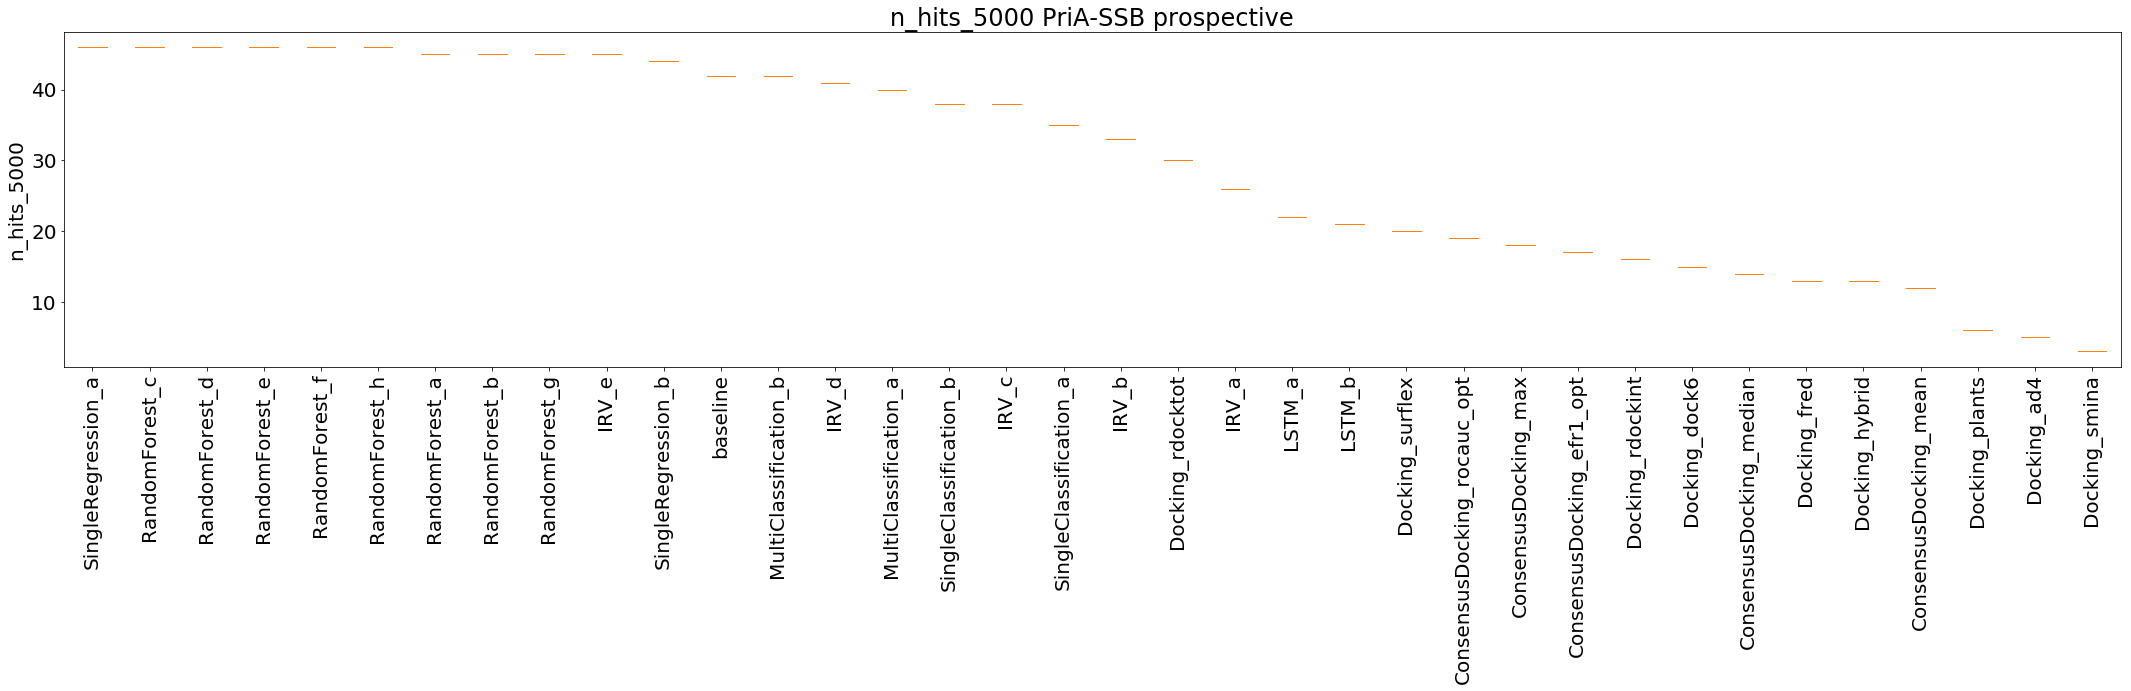

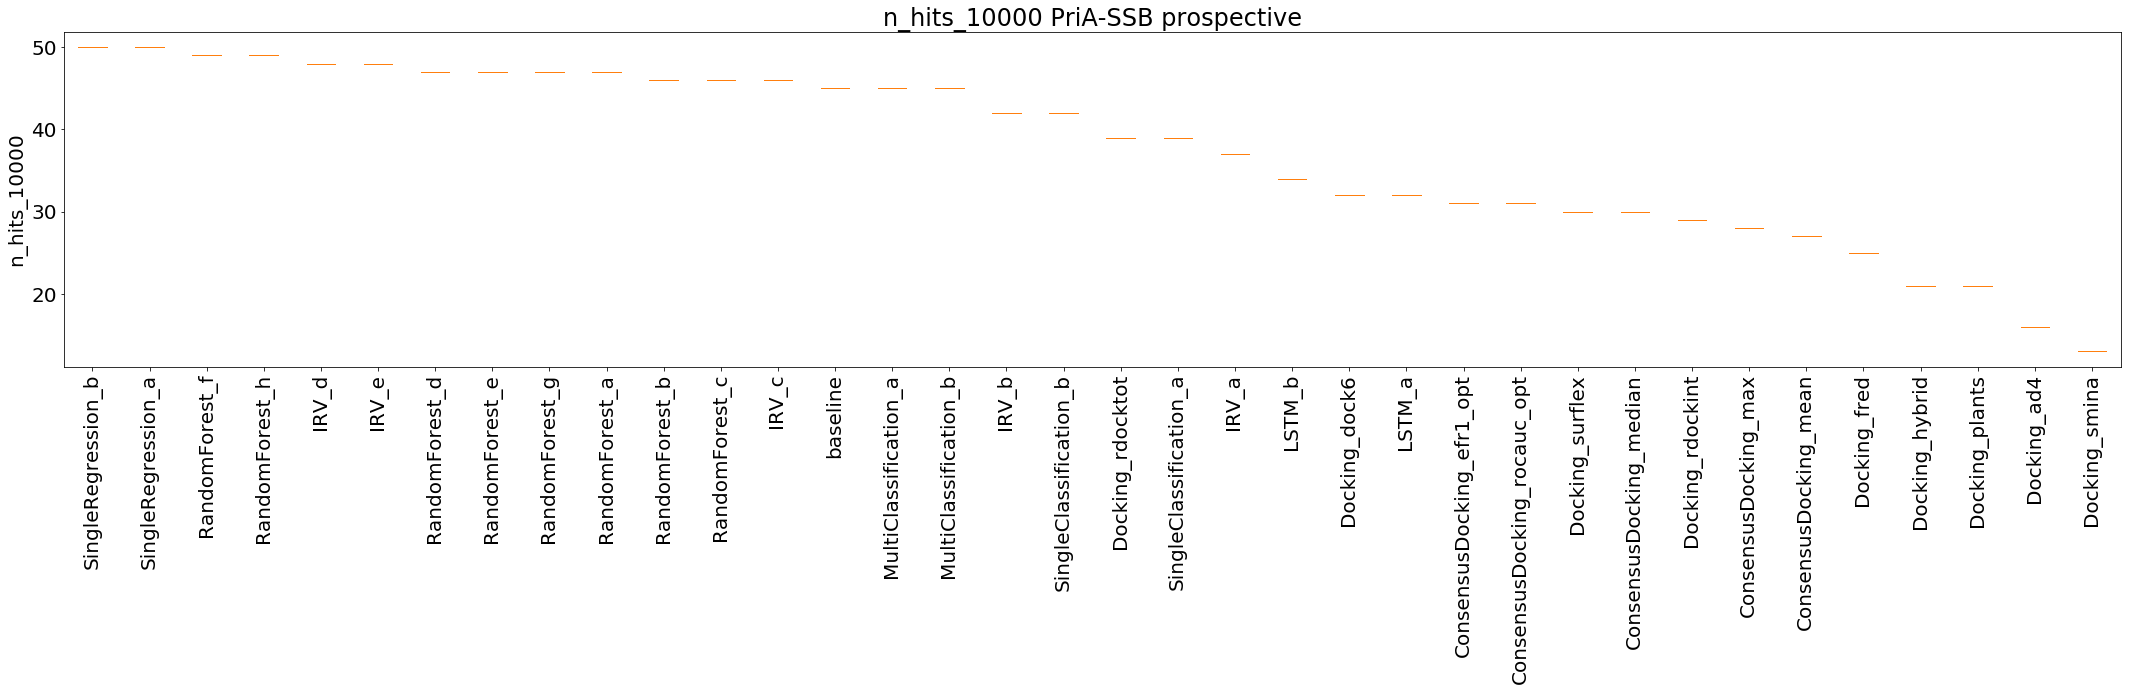

In [12]:
matplotlib.rcParams.update({'font.size': 20})
save_dir = './cv_ps_figures/ps_metric_plots_complete/'
labels=['PriA-SSB prospective']
plot_metrics_bp(gather_df, metric_names, labels, save_dir)